#Etapa de análise e limpeza de dados
por Leandro Barbosa

##Declarações

In [1]:
pip install -U scikit-learn

     |████████████████████████████████| 22.3MB 1.4MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [2]:
import math
import matplotlib.pyplot    as plt
import matplotlib.ticker    as ticker
import matplotlib.style     as style
import numpy                as np
import seaborn              as sns
import pandas               as pd

from urllib.request                 import urlopen
from zipfile                        import ZipFile
from statsmodels.graphics.tsaplots  import plot_acf, plot_pacf
from statsmodels.tsa.seasonal       import seasonal_decompose
from sklearn.metrics                import mean_squared_error
from sklearn.metrics                import mean_absolute_percentage_error
from sklearn.linear_model           import LinearRegression

stl = style.available
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [71]:
swap        = '/tmp/'
url2019     = 'https://drive.google.com/uc?id=1Zr21cViYLsFcA8UVVN0BCK-1hFbSMqQP&export=download'
urlINMET    = 'https://github.com/lvb86/MLPr_GA/blob/4c119c5d100c0e9b808e3b3775c1c64713b7844d/data/INMET.zip?raw=true'

In [4]:
mes = ['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez']
mesN = [1,2,3,4,5,6,7,8,9,10,11,12]

palettes = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r',
            'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r',
            'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r',
            'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r',
            'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r',
            'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn',
            'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r',
            'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r',
            'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r',
            'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3',
            'Set3_r', 'Spectral', 'Spectral_r',
            #'Vega10', 'Vega10_r', 'Vega20',
            'Vega20_r', 'Vega20b', 'Vega20b_r', 'Vega20c', 'Vega20c_r', 
            'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r',
            'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r',
            'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r',
            'brg', 'brg_r', 'bwr', 'bwr_r', 'cool', 'cool_r', 'coolwarm', 
            'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r',
            'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray',
            'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 
            'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern',
            'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2',
            'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv',
            'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 
            #'jet', ##'jet_r', 
            'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral',
            'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma',
            'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 
            'rocket_r', 'seismic', 'seismic_r', ##'spectral', 'spectral_r', 
            'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r',
            'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r',
            'terrain', 'terrain_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r',
            'winter', 'winter_r']

# Definições de estilo
if 1==1: #tema Claro para artigo retrato
    DefPalette = palettes[13] #13 Dark2
    DefPaletteHist = 'rocket'
    DefStyle = stl[15] #15 Seaborn-Darkgrid
    DefSize = (10,6) #(17,6)
    DefGrid = ('-')

else: # tema Escuro para apresentação paisagem
    DefPalette = palettes[123] #123 - hsv
    DefPaletteHist = 'rocket'
    DefStyle = stl[4] #15 dark_background
    DefSize = (10,6) #(17,6)
    DefGrid = (':')
    plt.rc_context({'axes.edgecolor':'gray', 'xtick.color':'white', 
                    'ytick.color':'white', 'figure.facecolor':'black'})


In [5]:
# Para traduzir ticker para PT-BR
def formatador_de_milhares(valor, p):
    valor = f"{valor:,.0f}"
    mapa_de_traducao = str.maketrans(',.', '.,')
    return valor.translate(mapa_de_traducao)
#exemplo de uso 
#ax.yaxis.set_major_formatter(ticker.FuncFormatter(formatador_de_milhares))
#Powered by @lpeixoto2000

## Análise de Consumo de Energia

In [6]:
df = pd.read_csv(url2019, encoding='UTF8', parse_dates=True, index_col='Data')
df.head()

TipoConsumidor Sistema  ... Consumidores Consumo
Data                               ...                     
2013-01-01         Cativo     Sul  ...          2.0    16.0
2013-02-01         Cativo     Sul  ...          2.0    21.0
2013-03-01         Cativo     Sul  ...          2.0    18.0
2013-04-01         Cativo     Sul  ...          2.0    16.0
2013-05-01         Cativo     Sul  ...          2.0    17.0

[5 rows x 14 columns]

In [7]:
df.index.year.unique()

Int64Index([2013, 2014, 2015, 2016, 2017, 2018], dtype='int64', name='Data')

In [8]:
df.columns

Index(['TipoConsumidor', 'Sistema', 'UF', 'SetorN1', 'SetorN2', 'SetorN3',
       'Tensão N1', 'Tensão N2', 'Tensão N3', 'Tensão N4',
       'Faixa de Consumo N1', 'Faixa de Consumo N2', 'Consumidores',
       'Consumo'],
      dtype='object')

In [9]:
df['SetorN1'].unique()

array(['Residencial', 'Industrial', 'Comercial', 'Rural', 'Poder Público',
       'Iluminação Pública', 'Serviço Público', 'Consumo Próprio'],
      dtype=object)

In [10]:
df.sample(5)

TipoConsumidor                 Sistema  ... Consumidores    Consumo
Data                                               ...                        
2017-03-01         Cativo       Sistemas Isolados  ...        181.0    434.000
2013-08-01         Cativo                Nordeste  ...      92949.0   4794.000
2013-04-01         Cativo  Sudeste / Centro-Oeste  ...          1.0      7.000
2017-01-01         Cativo                     Sul  ...          8.0      1.000
2018-04-01          Livre                Nordeste  ...          1.0  15715.555

[5 rows x 14 columns]

In [11]:
df2018 = df.loc['2018']

In [12]:
df2018RS = df2018.query("UF == 'RS'")

In [13]:
df2018RS['SetorN1'].unique()

array(['Industrial', 'Residencial', 'Comercial', 'Rural', 'Poder Público',
       'Iluminação Pública', 'Serviço Público', 'Consumo Próprio'],
      dtype=object)

Delimitando o problema dar uma olhada no perfil dos dados... 

In [14]:
drs = df2018RS[['SetorN1','Consumo']].reset_index().groupby(['Data','SetorN1']).sum()
(drs.loc['2018-01-01'].sum()/1000_1000)*12

Consumo    3.376102
dtype: float64

In [15]:
drs['Consumo'].sum()/1000_000

30.417987882

Recorte do anuário 2018 para conferir. 

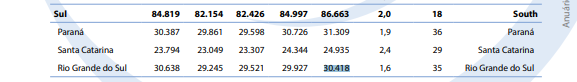

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

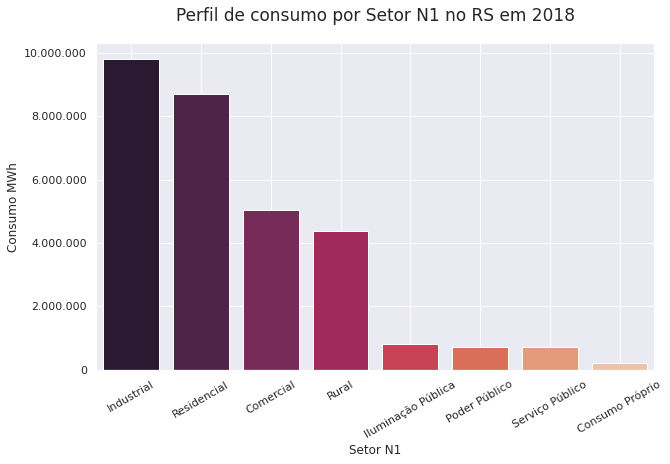

In [16]:
sns.set_theme()
style.use(DefStyle)  #4
plt.figure(figsize=(DefSize))
ax = sns.barplot(data = drs.groupby('SetorN1').sum().sort_values('Consumo',
    ascending=False).reset_index(),x='SetorN1',y='Consumo', palette = DefPaletteHist)
#plt.ylim(0,150)
plt.grid(True,linestyle = DefGrid)
plt.title('Perfil de consumo por Setor N1 no RS em 2018', fontsize=17, y=1.05)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(formatador_de_milhares))
plt.ylabel('Consumo MWh')
plt.xlabel('Setor N1')
plt.xticks(rotation = 30)
#ax.legend(loc='center right', bbox_to_anchor=(1.32, 0.5),ncol=1,fancybox=True, shadow=True)


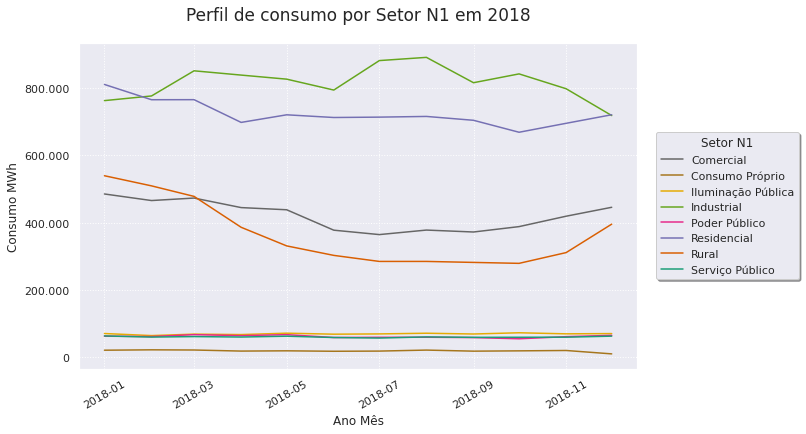

In [17]:
sns.set_theme()
style.use(DefStyle)  #4
plt.figure(figsize=DefSize)
ax = sns.lineplot( data=drs.reset_index(), x='Data', y ='Consumo', hue='SetorN1', palette=DefPalette) 
plt.xticks(rotation = 30)
#plt.ylim(0,150)
plt.grid(True,linestyle = ':')
plt.title('Perfil de consumo por Setor N1 em 2018', fontsize=17, y= 1.05)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(formatador_de_milhares))
plt.ylabel('Consumo MWh',)
plt.xlabel('Ano Mês')
ax.legend(loc='center right', bbox_to_anchor=(1.30, 0.5),ncol=1,fancybox=True, shadow=True, title='Setor N1')

plt.show()

In [18]:
drs_std = drs.reset_index().groupby(['SetorN1']).std().sort_values(by = 'Consumo',ascending=False).rename(columns={"Consumo": "std"})
drs_std = drs_std.reset_index()

No handles with labels found to put in legend.


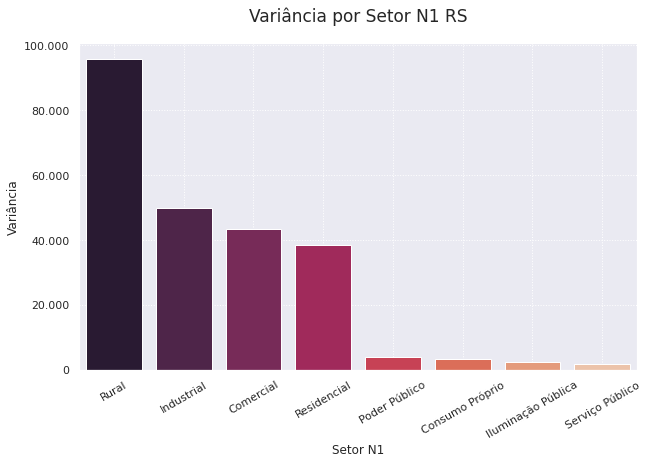

In [19]:
#style.use(stl[4])  #4
#ax = drs_std.plot(kind = 'bar', x = 'SetorN1')
plt.figure(figsize=(DefSize))
ax = sns.barplot(data=drs_std, x = 'SetorN1', y='std', palette=DefPaletteHist)
plt.grid(True,linestyle = ':')
plt.title('Variância por Setor N1 RS', fontsize=17, y=1.05)
ax.legend().remove()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(formatador_de_milhares))
plt.xticks(rotation = 30)
plt.ylabel('Variância')
plt.xlabel('Setor N1')

plt.show()

Opção por consumo rural devido a maior desvio padrão

In [20]:
dfrsrural = df.query("UF=='RS'").query("SetorN1 == 'Rural'")['Consumo'].reset_index()

In [21]:
dfrsrural['Ano'] = dfrsrural['Data'].dt.year
dfrsrural['Mes'] = dfrsrural['Data'].dt.month

In [22]:
dfrsrural = dfrsrural.groupby(['Ano','Mes','Data']).sum()

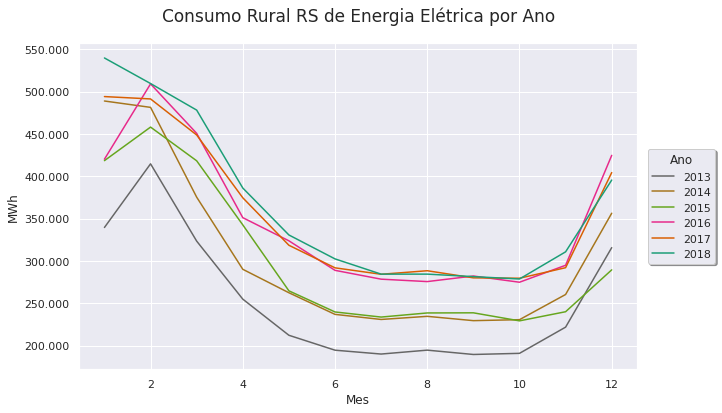

In [23]:
sns.set_theme()
style.use(DefStyle)
plt.figure(figsize=DefSize)
ax = sns.lineplot( data=dfrsrural, x='Mes', y ='Consumo', hue='Ano', palette=DefPalette)
ax.legend(loc='center right', bbox_to_anchor=(1.15, 0.5),ncol=1,fancybox=True, shadow=True, title = 'Ano')
plt.ylabel('MWh')
plt.title('Consumo Rural RS de Energia Elétrica por Ano',y=1.05,fontsize = 17)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(formatador_de_milhares))

plt.grid(True,linestyle = DefGrid)
#plt.xticks(rotation = 30)
#plt.ylim(0,75000)

plt.show()

In [24]:
decomposicao = seasonal_decompose(dfrsrural.reset_index()[['Data','Consumo']].set_index('Data'), model='multiplicative')

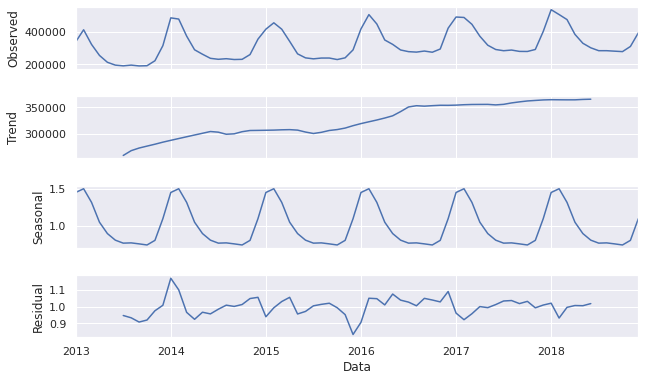

In [25]:
    sns.set_theme()
    style.use(DefStyle)
    ax = decomposicao.plot()   
    plt.gcf().set_size_inches(DefSize)
    
    plt.show();

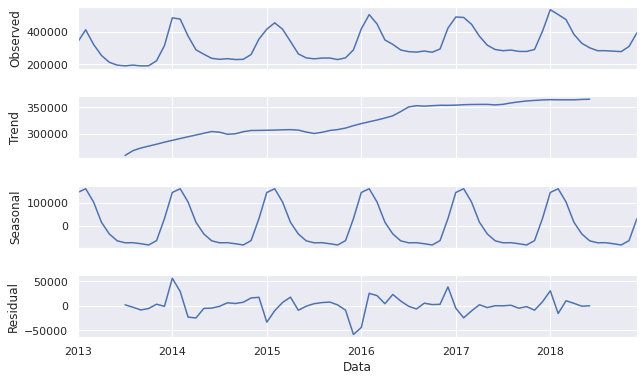

In [26]:
decomposicao = seasonal_decompose(dfrsrural.reset_index()[['Data','Consumo']].set_index('Data'))
decomposicao.plot()
plt.gcf().set_size_inches(DefSize)
plt.show();

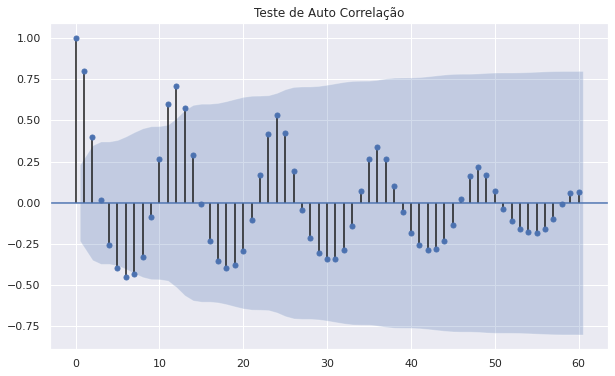

In [27]:
ax = plot_acf(dfrsrural['Consumo'],lags=60);
style.use(DefStyle) 
#plt.rc_context({'axes.edgecolor':'gray', 'xtick.color':'white', 'ytick.color':'white', 'figure.facecolor':'black'})

plt.title('Teste de Auto Correlação')
plt.gcf().set_size_inches(10, 6)
plt.grid(True,linestyle = DefGrid)
plt.show();

>Auto Correlação Positiva forte a cada 12M

>Auto Correlação Inversa Média a cada 6M

>Indicando uma possivel relação com o clima e as estações 


## Dados Solares






In [28]:
# http://www.cresesb.cepel.br/
# Irradiação solar diária média [kWh/m2.dia]
# Santa Maria	Santa Maria	RS	BRASIL	29,701° S	53,749° O
mes = ['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez']
sol = [6.41,5.93,4.94,3.87,2.81,2.34,2.56,3.30,3.74,4.88,6.22,6.76]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


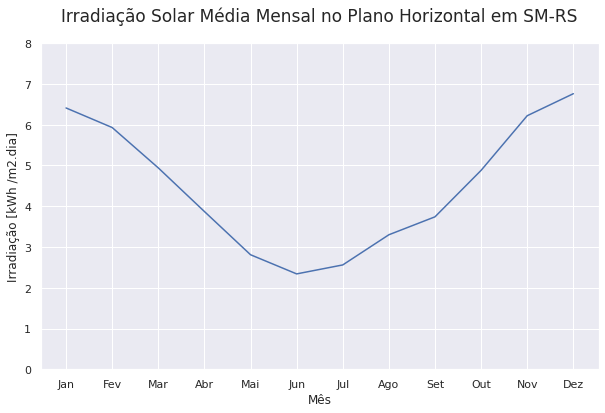

In [29]:
plt.figure(figsize=DefSize)
sns.lineplot(mes,sol)
plt.ylim(0,8)
plt.grid(True)
plt.title('Irradiação Solar Média Mensal no Plano Horizontal em SM-RS', y=1.05,fontsize = 17)
plt.ylabel('Irradiação [kWh /m2.dia]')
plt.xlabel('Mês')
plt.show()

## Dado INMET
INMET_S_RS_A803_SANTA MARIA_01-01-2020_A_31-12-2020
Fonte: https://bdmep.inmet.gov.br/

In [30]:
zipresp = urlopen(urlINMET)                # Download from URL
tempzip = open("/tmp/tempfile.zip", "wb")  # Create a new file
tempzip.write(zipresp.read())              # Write the contents of the downloaded file into the new file
tempzip.close()                            # Close the newly-created file
zip = ZipFile("/tmp/tempfile.zip")         # Re-open the newly-created file with ZipFile()

#Adaptado de 
#https://svaderia.github.io/articles/downloading-and-unzipping-a-zipfile/

In [31]:
#zip.infolist()
zip.namelist()

['dados_A801_M_2013-01-01_2018-12-31.csv',
 'dados_A802_M_2013-01-01_2018-12-31.csv',
 'dados_A803_M_2013-01-01_2018-12-31.csv',
 'dados_A804_M_2013-01-01_2018-12-31.csv',
 'dados_A805_M_2013-01-01_2018-12-31.csv',
 'dados_A808_M_2013-01-01_2018-12-31.csv',
 'dados_A809_M_2013-01-01_2018-12-31.csv',
 'dados_A810_M_2013-01-01_2018-12-31.csv',
 'dados_A811_M_2013-01-01_2018-12-31.csv',
 'dados_A812_M_2013-01-01_2018-12-31.csv',
 'dados_A813_M_2013-01-01_2018-12-31.csv',
 'dados_A826_M_2013-01-01_2018-12-31.csv',
 'dados_A827_M_2013-01-01_2018-12-31.csv',
 'dados_A828_M_2013-01-01_2018-12-31.csv',
 'dados_A829_M_2013-01-01_2018-12-31.csv',
 'dados_A830_M_2013-01-01_2018-12-31.csv',
 'dados_A831_M_2013-01-01_2018-12-31.csv',
 'dados_A832_M_2013-01-01_2018-12-31.csv',
 'dados_A833_M_2013-01-01_2018-12-31.csv',
 'dados_A834_M_2013-01-01_2018-12-31.csv',
 'dados_A836_M_2013-01-01_2018-12-31.csv',
 'dados_A837_M_2013-01-01_2018-12-31.csv',
 'dados_A838_M_2013-01-01_2018-12-31.csv',
 'dados_A83

In [32]:
listINMET = []
listINMET.append('dados_A801_M_2013-01-01_2018-12-31.csv')
listINMET.append('dados_A802_M_2013-01-01_2018-12-31.csv')
listINMET.append('dados_A803_M_2013-01-01_2018-12-31.csv')
listINMET.append('dados_A804_M_2013-01-01_2018-12-31.csv')
listINMET.append('dados_A805_M_2013-01-01_2018-12-31.csv')
listINMET.append('dados_A808_M_2013-01-01_2018-12-31.csv')
listINMET.append('dados_A809_M_2013-01-01_2018-12-31.csv')
listINMET.append('dados_A810_M_2013-01-01_2018-12-31.csv')
listINMET.append('dados_A811_M_2013-01-01_2018-12-31.csv')
listINMET.append('dados_A812_M_2013-01-01_2018-12-31.csv')
listINMET.append('dados_A813_M_2013-01-01_2018-12-31.csv')
listINMET.append('dados_A826_M_2013-01-01_2018-12-31.csv')
listINMET.append('dados_A827_M_2013-01-01_2018-12-31.csv')
listINMET.append('dados_A828_M_2013-01-01_2018-12-31.csv')
listINMET.append('dados_A829_M_2013-01-01_2018-12-31.csv')
listINMET.append('dados_A830_M_2013-01-01_2018-12-31.csv')
listINMET.append('dados_A831_M_2013-01-01_2018-12-31.csv')
listINMET.append('dados_A832_M_2013-01-01_2018-12-31.csv')
listINMET.append('dados_A833_M_2013-01-01_2018-12-31.csv')
listINMET.append('dados_A834_M_2013-01-01_2018-12-31.csv')
listINMET.append('dados_A836_M_2013-01-01_2018-12-31.csv')
listINMET.append('dados_A837_M_2013-01-01_2018-12-31.csv')
listINMET.append('dados_A838_M_2013-01-01_2018-12-31.csv')
listINMET.append('dados_A839_M_2013-01-01_2018-12-31.csv')
listINMET.append('dados_A840_M_2013-01-01_2018-12-31.csv')
listINMET.append('dados_A844_M_2013-01-01_2018-12-31.csv')
listINMET.append('dados_A852_M_2013-01-01_2018-12-31.csv')
listINMET.append('dados_A853_M_2013-01-01_2018-12-31.csv')
listINMET.append('dados_A854_M_2013-01-01_2018-12-31.csv')
listINMET.append('dados_A856_M_2013-01-01_2018-12-31.csv')
listINMET.append('dados_A878_M_2013-01-01_2018-12-31.csv')
listINMET.append('dados_A879_M_2013-01-01_2018-12-31.csv')
listINMET.append('dados_A881_M_2013-01-01_2018-12-31.csv')
listINMET.append('dados_A882_M_2013-01-01_2018-12-31.csv')
listINMET.append('dados_A883_M_2013-01-01_2018-12-31.csv')
listINMET.append('dados_A884_M_2013-11-28_2018-12-31.csv')
#listINMET.append('dados_A886_M_2016-08-10_2018-12-31.csv')
#listINMET.append('dados_A889_M_2016-04-05_2018-12-31.csv')
#listINMET.append('dados_A893_M_2018-03-14_2018-12-31.csv')
#listINMET.append('dados_A894_M_2016-03-31_2018-12-31.csv')
#listINMET.append('dados_A897_M_2016-11-23_2018-12-31.csv')
listINMET.append('dados_A899_M_2013-01-01_2018-12-31.csv')

In [33]:
for e,i in enumerate(listINMET):
    if e ==0: 
        clima = pd.read_csv(zip.open(i),encoding='UTF-8', skiprows=9, sep=';',parse_dates=True, decimal=',')
        clima['origem'] = i[6:10]
    else:
        clima2 = pd.read_csv(zip.open(i),encoding='UTF-8', skiprows=9, sep=';',parse_dates=True, decimal=',')
        clima2['origem'] = i[6:10]
        clima = clima.append(clima2)
clima.sample(5)
clima.shape

(2654, 9)

In [34]:
#Carregando todos cabeçalhos dos arquivos INMET
for e, i in enumerate(listINMET):
    if e ==0:
        climaH = pd.read_csv(zip.open(i), encoding='UTF-8', nrows=8, sep=': ',
                             parse_dates=True, decimal=',').T
        header = climaH.iloc[0]
        climaH.columns = header
        climaH = climaH[1:]
    else:
        climaH2 = pd.read_csv(zip.open(i), encoding='UTF-8', nrows=8, sep=': ',
                              parse_dates=True, decimal=',').T
        climaH2.columns = header
        climaH2 = climaH2[1:]
        climaH = climaH.append(climaH2)
climaH.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # This is added back by InteractiveShellApp.init_path()


(37, 8)

In [35]:
climaH = climaH.reset_index().set_index('Codigo Estacao').rename(columns={'index':'Cidade','Codigo Estacao':'origem'})

In [36]:
clima = clima.fillna(method='ffill')

In [37]:
colunasNomes = {
    'Data Medicao':'data',
    'NUMERO DE DIAS COM PRECIP. PLUV, MENSAL (AUT)(número)':'Dias_com_precip',
    'PRECIPITACAO TOTAL, MENSAL (AUT)(mm)':'precipitacao',
    'PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)':'pressao',
    'TEMPERATURA MEDIA, MENSAL (AUT)(°C)':'temperatura',
    'VENTO, VELOCIDADE MAXIMA MENSAL (AUT)(m/s)':'vento_max',
    'VENTO, VELOCIDADE MEDIA MENSAL (AUT)(m/s)':'vento_med', 
    'Unnamed: 7':'un',
    'origem':'origem'
}
clima.rename(columns=colunasNomes, inplace = True)
clima.drop(columns=['un'], inplace = True)
clima.columns

Index(['data', 'Dias_com_precip', 'precipitacao', 'pressao', 'temperatura',
       'vento_max', 'vento_med', 'origem'],
      dtype='object')

In [38]:
climaH.head()


Nome                           Cidade  ... Periodicidade da Medicao
Codigo Estacao                         ...                         
A801                     PORTO ALEGRE  ...                   Mensal
A802                       RIO GRANDE  ...                   Mensal
A803                      SANTA MARIA  ...                   Mensal
A804            SANTANA DO LIVRAMENTO  ...                   Mensal
A805                    SANTO AUGUSTO  ...                   Mensal

[5 rows x 8 columns]

In [39]:
climaEX = pd.merge(clima,climaH, left_on='origem', right_on='Codigo Estacao', how='right')

In [40]:
parametros = clima.columns[1:-1]

In [41]:
Mediatemperatura = climaEX[['data','temperatura']].groupby('data').mean()
Mediatemperatura.rename(columns={'temperatura':('temperatura','media')}, inplace = True)

MediaDias_com_precip = climaEX[['data','Dias_com_precip']].groupby('data').mean()
MediaDias_com_precip.rename(columns={'Dias_com_precip':('Dias_com_precip','media')}, inplace = True)

Mediaprecipitacao = climaEX[['data','precipitacao']].groupby('data').mean()
Mediaprecipitacao.rename(columns={'precipitacao':('precipitacao','media')}, inplace = True)

Mediapressao = climaEX[['data','pressao']].groupby('data').mean()
Mediapressao.rename(columns={'pressao':('pressao','media')}, inplace = True)

Mediavento_max = climaEX[['data','vento_max']].groupby('data').mean()
Mediavento_max.rename(columns={'vento_max':('vento_max','media')}, inplace = True)

Mediavento_med = climaEX[['data','vento_med']].groupby('data').mean()
Mediavento_med.rename(columns={'vento_med':('vento_med','media')}, inplace = True)

In [42]:
climaPivot = climaEX[['data','temperatura','Cidade']].pivot('data','Cidade')
climaPivot = pd.merge(climaPivot, Mediatemperatura, right_on='data', left_on='data')

climaPivot2 = climaEX[['data','Dias_com_precip','Cidade']].pivot('data','Cidade')
climaPivot2 = pd.merge(climaPivot2, MediaDias_com_precip, right_on='data', left_on='data')
climaPivot = pd.merge(climaPivot, climaPivot2, right_on='data', left_on='data')

climaPivot2 = climaEX[['data','precipitacao','Cidade']].pivot('data','Cidade')
climaPivot2 = pd.merge(climaPivot2, Mediaprecipitacao, right_on='data', left_on='data')
climaPivot = pd.merge(climaPivot, climaPivot2, right_on='data', left_on='data')

climaPivot2 = climaEX[['data','pressao','Cidade']].pivot('data','Cidade')
climaPivot2 = pd.merge(climaPivot2, Mediapressao, right_on='data', left_on='data')
climaPivot = pd.merge(climaPivot, climaPivot2, right_on='data', left_on='data')

climaPivot2 = climaEX[['data','vento_max','Cidade']].pivot('data','Cidade')
climaPivot2 = pd.merge(climaPivot2, Mediavento_max, right_on='data', left_on='data')
climaPivot = pd.merge(climaPivot, climaPivot2, right_on='data', left_on='data')

climaPivot2 = climaEX[['data','vento_med','Cidade']].pivot('data','Cidade')
climaPivot2 = pd.merge(climaPivot2, Mediavento_med, right_on='data', left_on='data')
climaPivot = pd.merge(climaPivot, climaPivot2, right_on='data', left_on='data')

climaPivot.head()


/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


temperatura             ...  vento_med          
Cidade        ALEGRETE       BAGE  ... URUGUAIANA     media
data                               ...                     
2013-01-31   23.786694  21.754167  ...   3.165054  3.053842
2013-02-28   23.691815  22.096131  ...   3.203720  2.835475
2013-03-31   20.572126  19.188075  ...   3.060278  2.849183
2013-04-30   19.190833  18.074722  ...   2.568056  2.475605
2013-05-31   15.472581  14.034812  ...   2.653495  2.375910

[5 rows x 228 columns]

In [43]:
def analise_correlacao(par):
    '''
    Fitra prarâmetro no data frame para gerar mapa de correlação e ranking
    par: entrada de parâmento  
    return mapa de correlação e ranking 
    '''

    display(par)
    df = climaPivot[par]
    #display(df.head())
    #display(df.corr())
    
    plt.figure(figsize=(30,30))
    ax = sns.heatmap(df.corr(),cmap="YlGnBu", annot=True) 
    plt.title('Correlação Cruzada de '+ par,fontsize=20,y=1.10)
    plt.show();

    ranking = climaPivot[par].corr().sum()
    ranking.sort_values(ascending=False, inplace=True)
    rangingCorrMed = ranking/len(ranking)
    #sns.barplot(rangingCorrMed.reset_index())
    plt.figure(figsize=DefSize)
    ax = rangingCorrMed[:10].plot(kind='bar')
    plt.title('Ranking top 10 maiores correlações médias de '+ par,fontsize=17,y=1.05)
    plt.ylim(rangingCorrMed[10],rangingCorrMed.max())
    plt.show();


'Dias_com_precip'

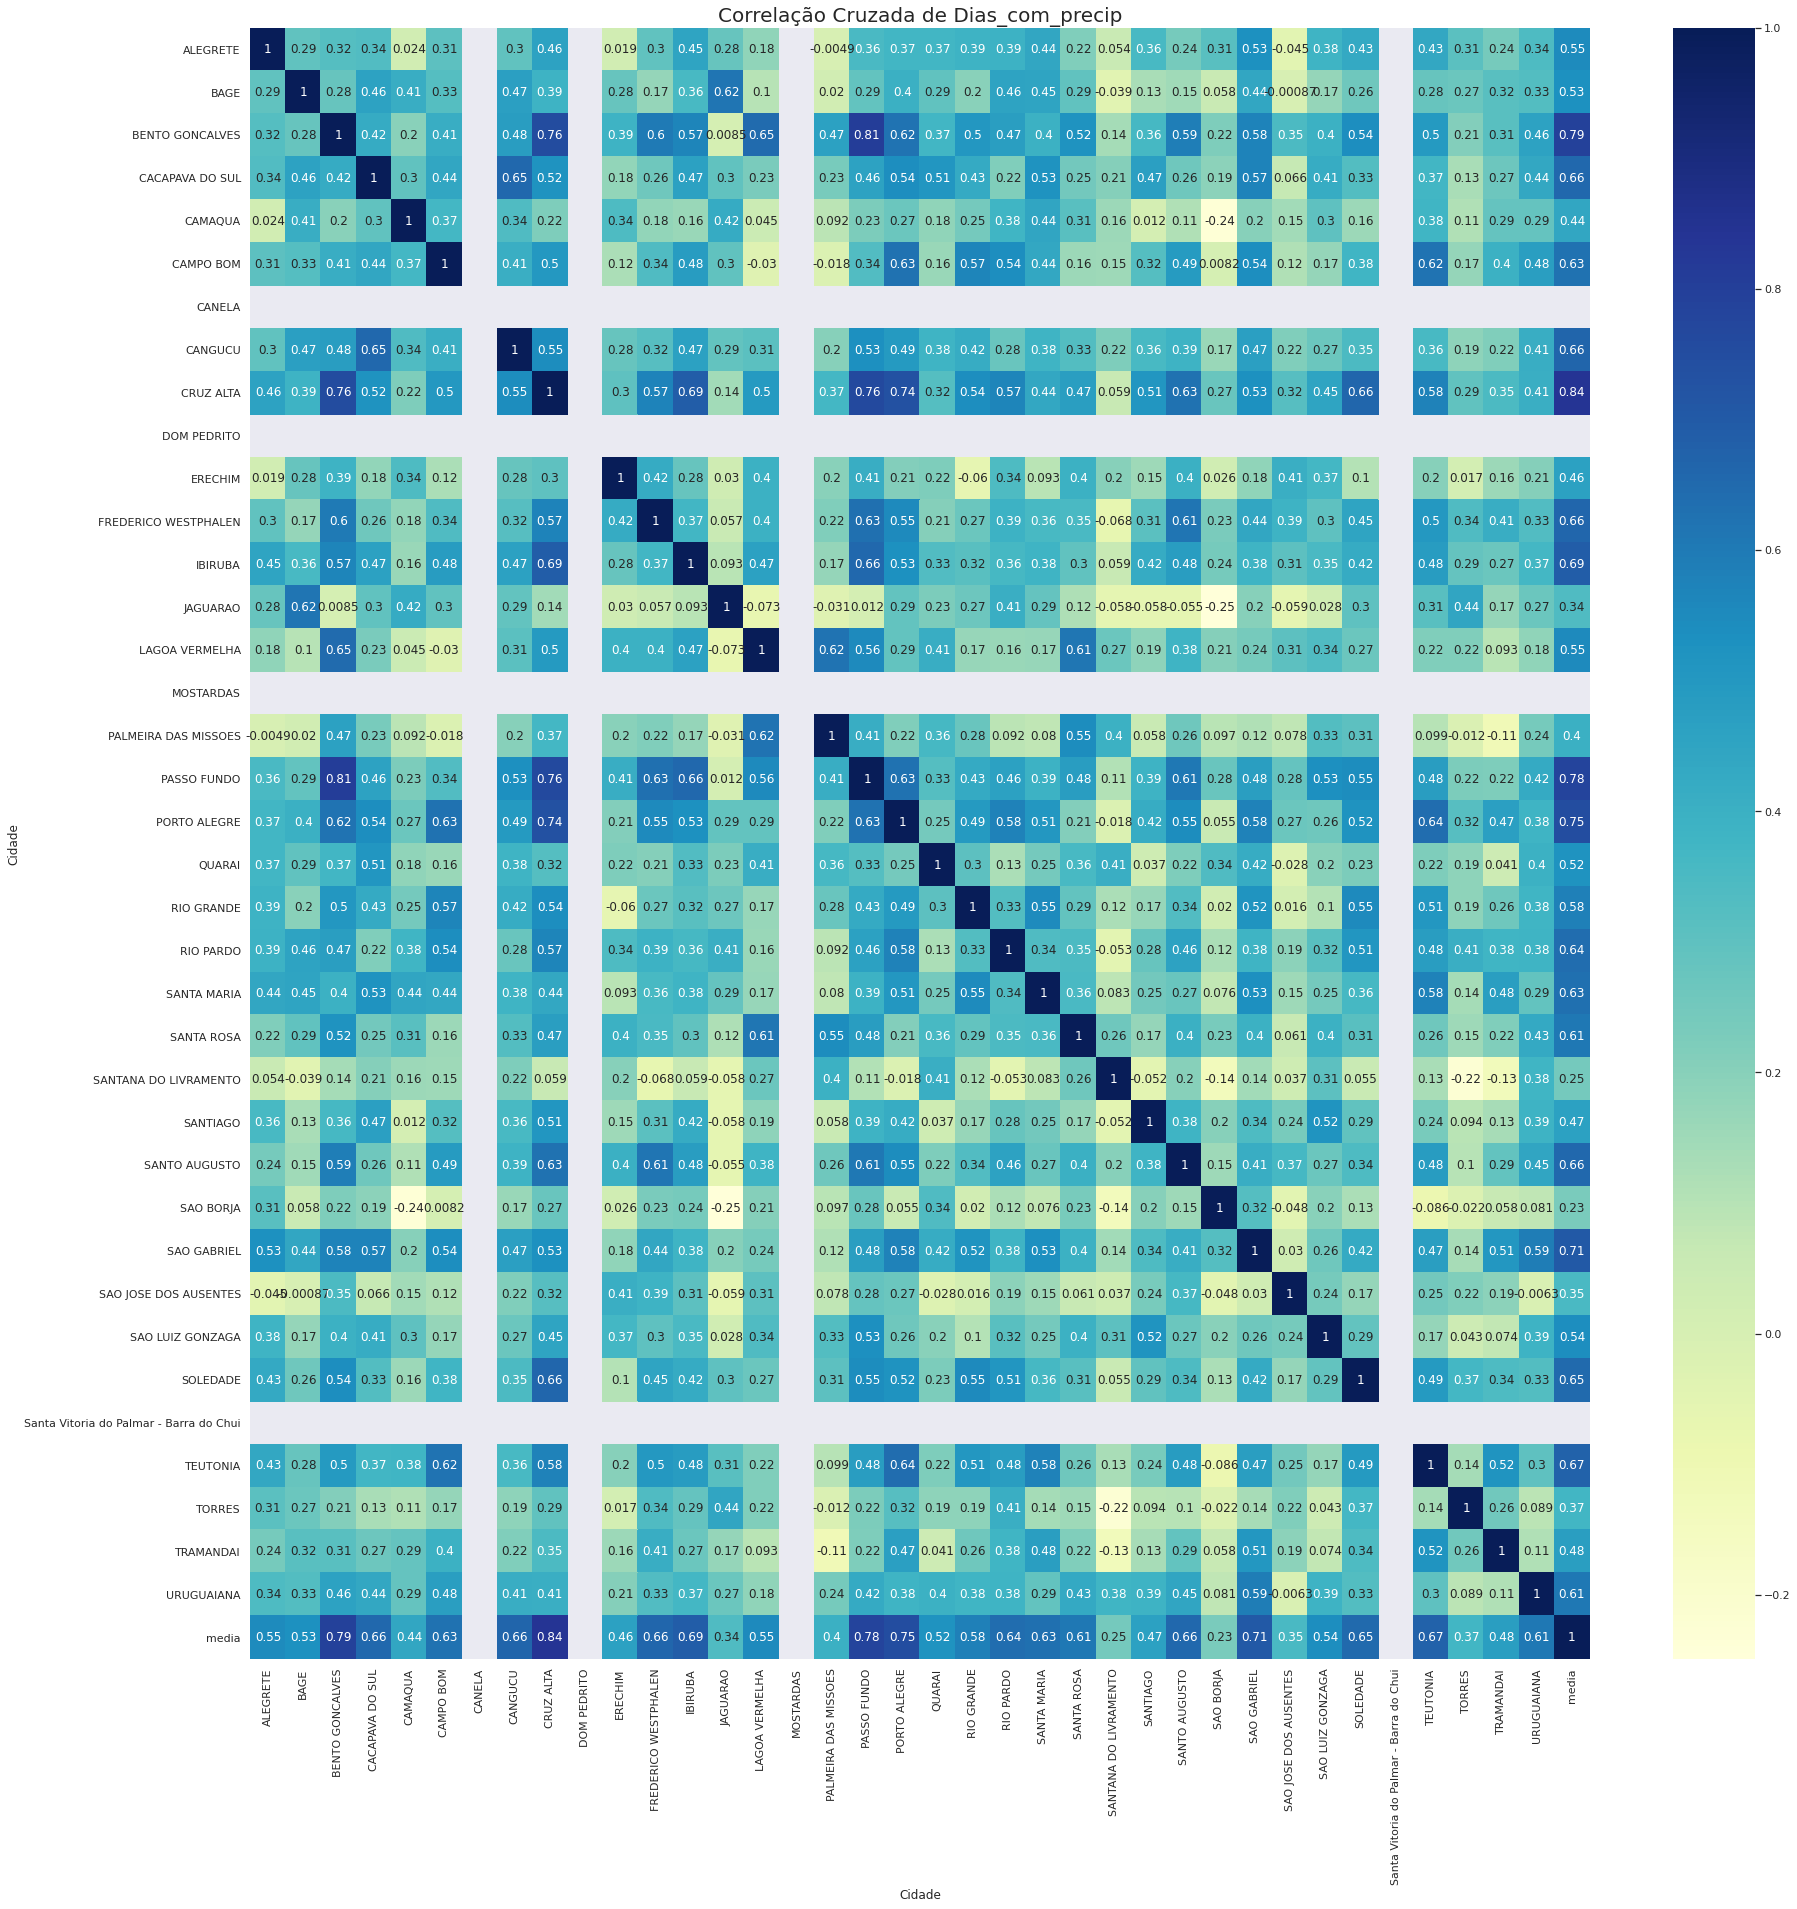

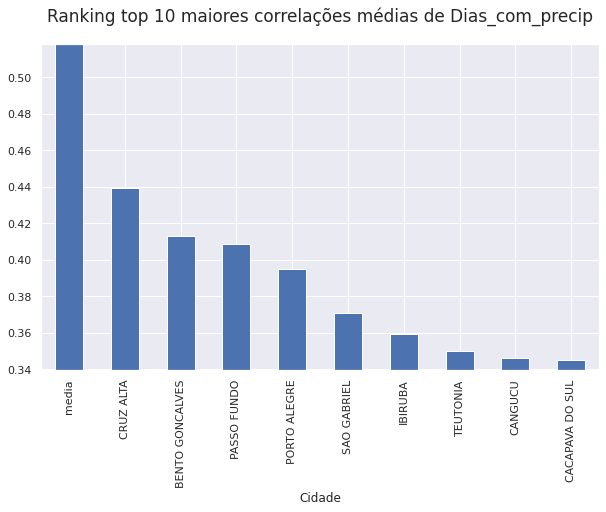

'precipitacao'

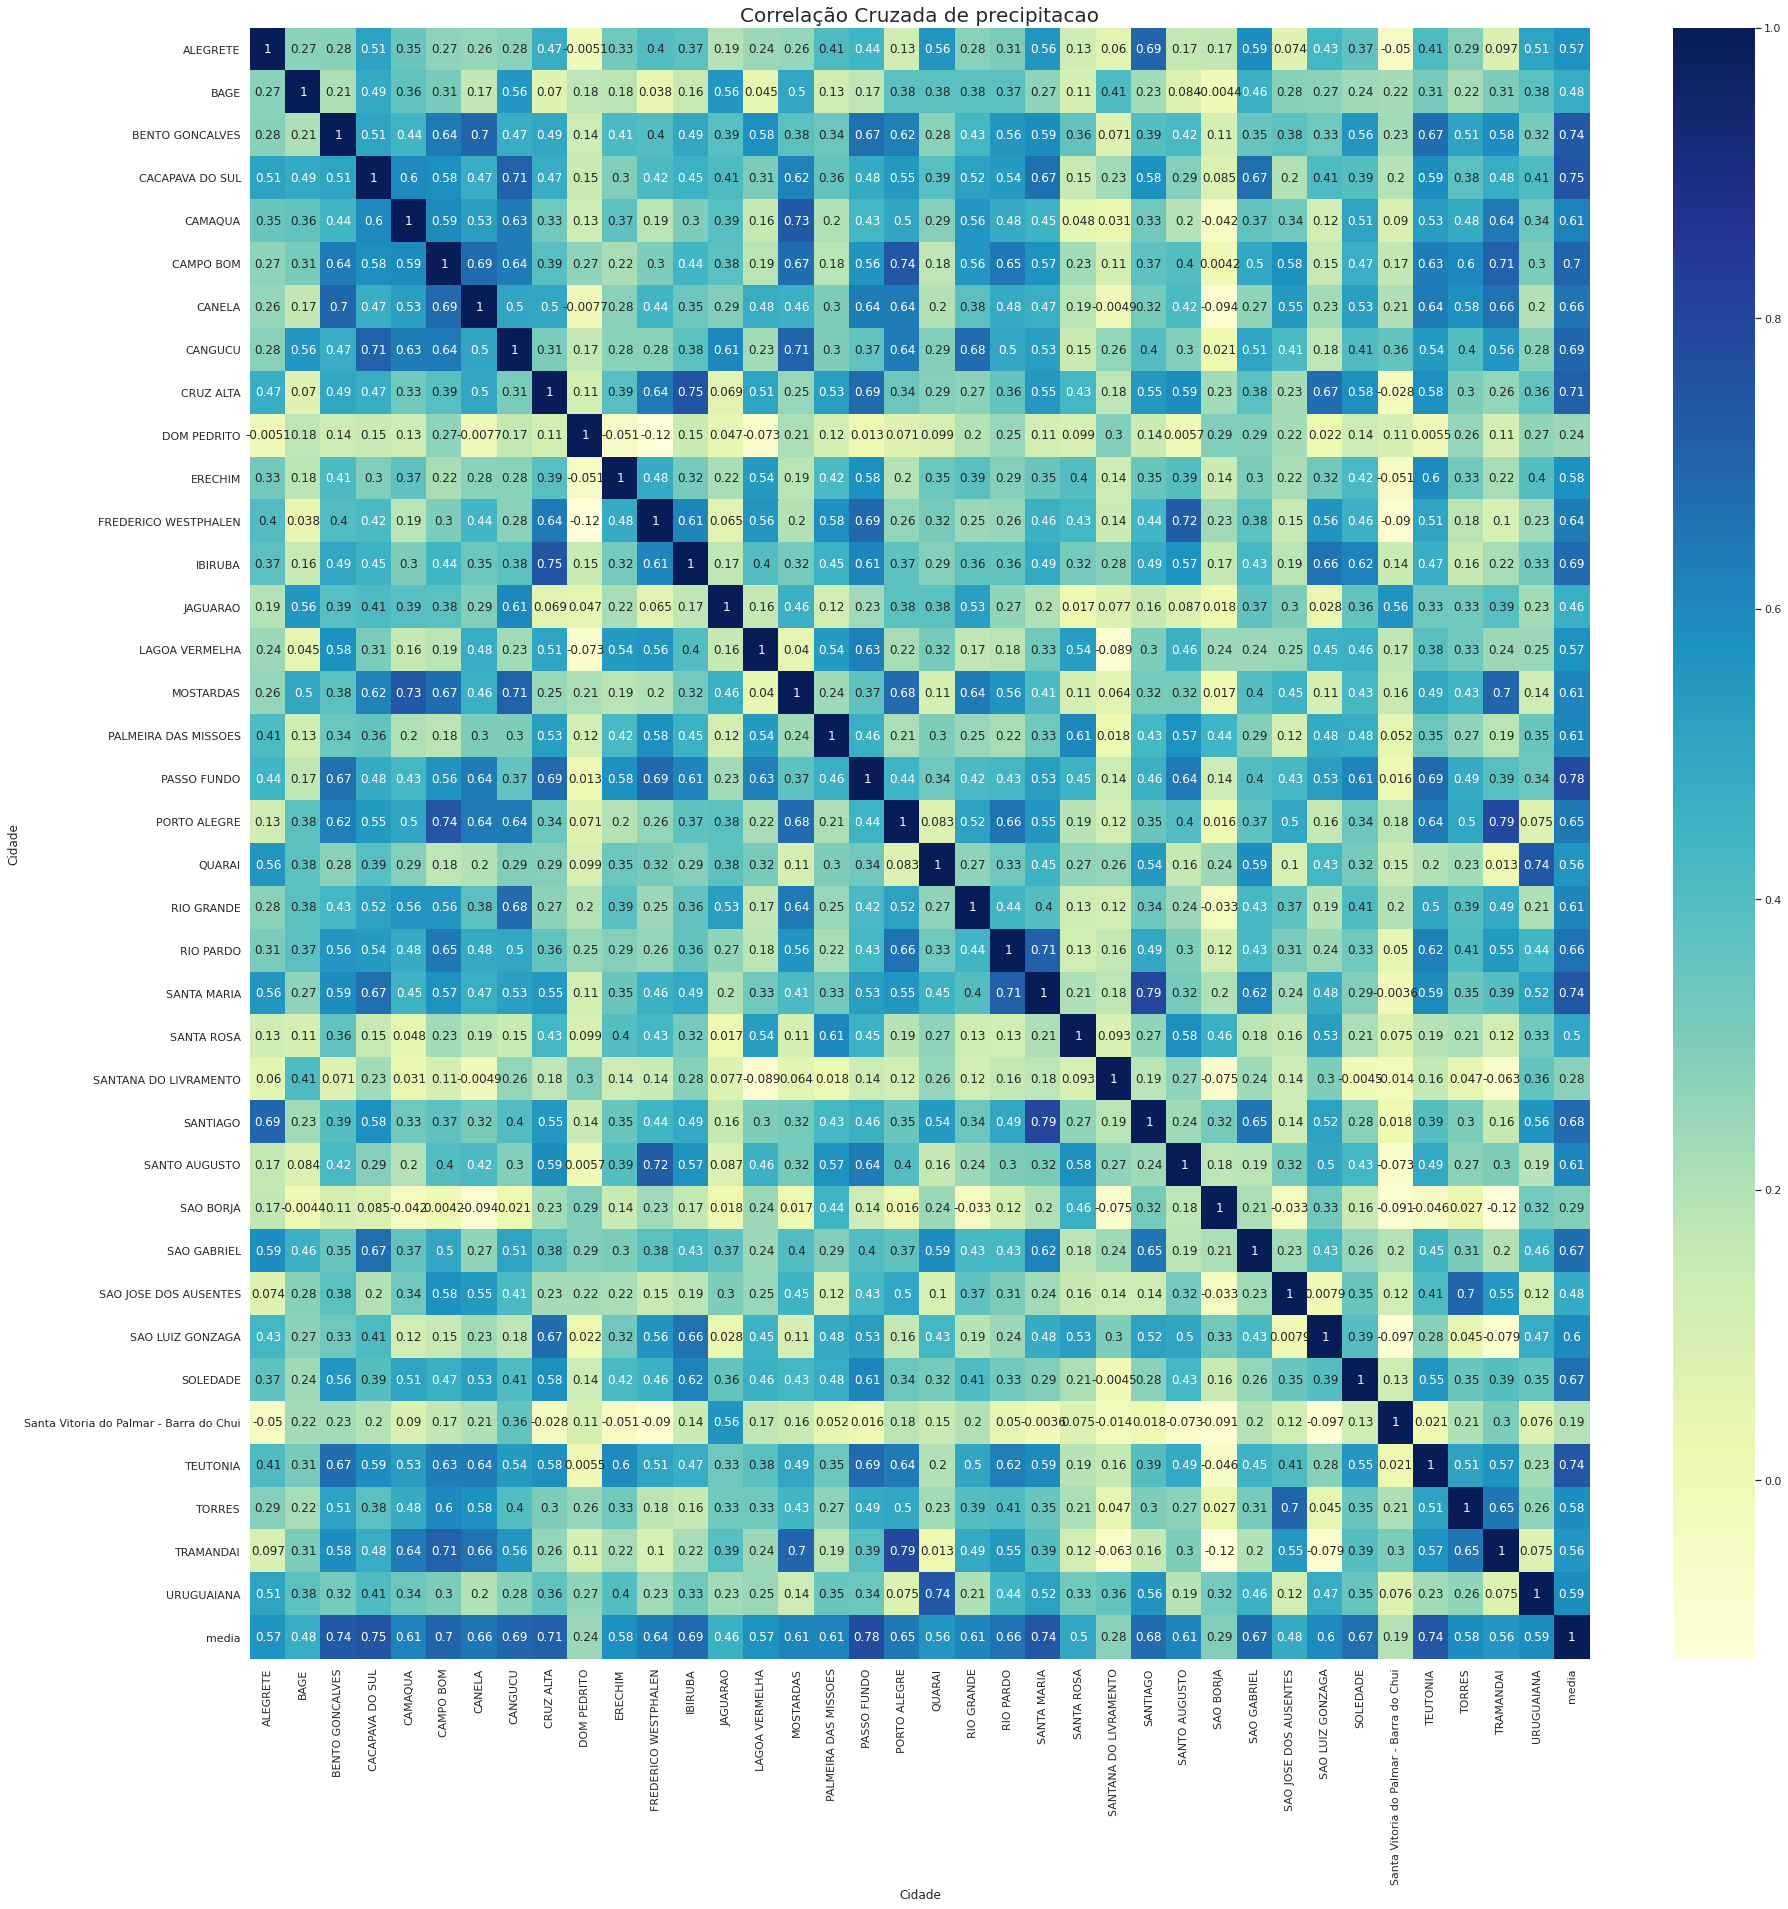

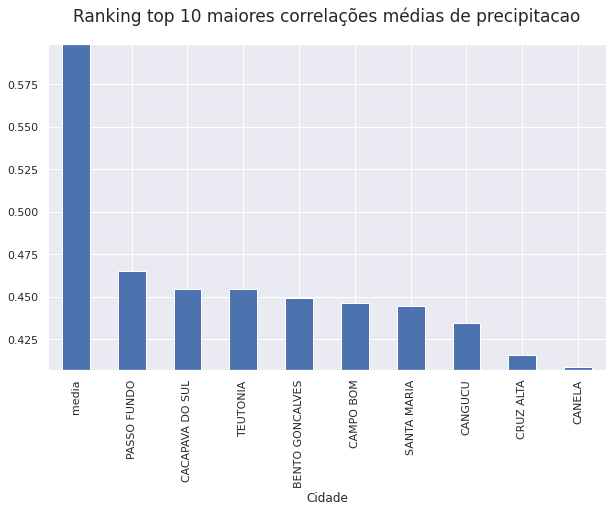

'pressao'

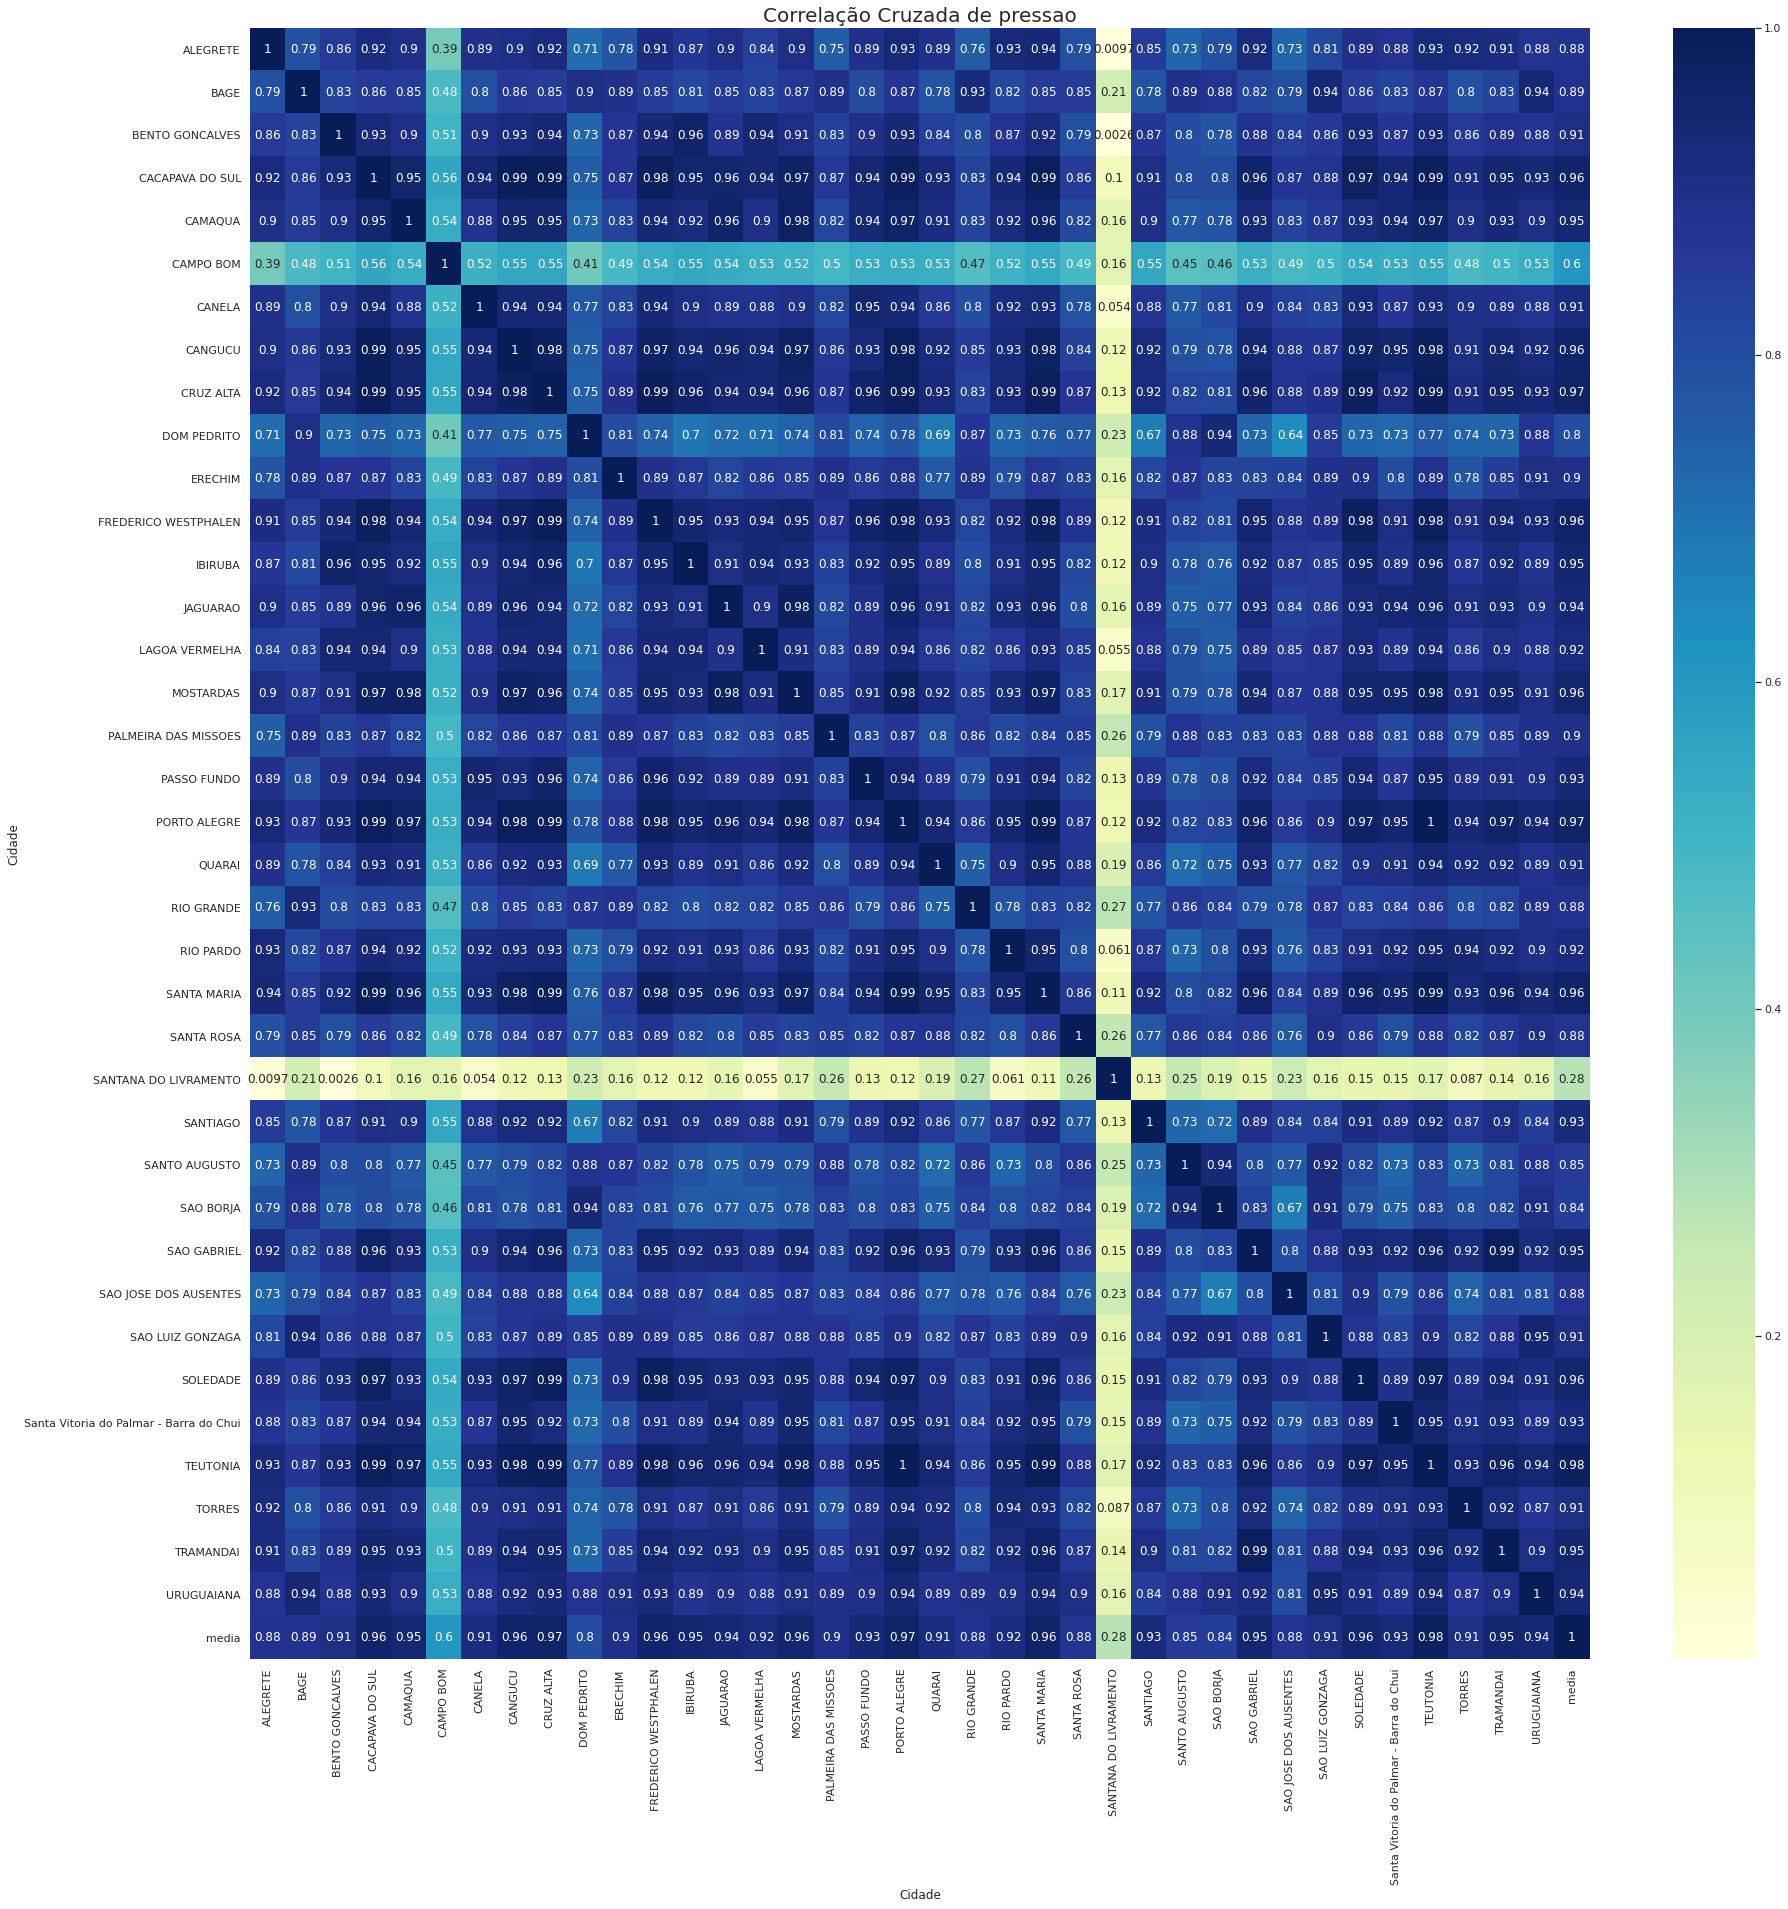

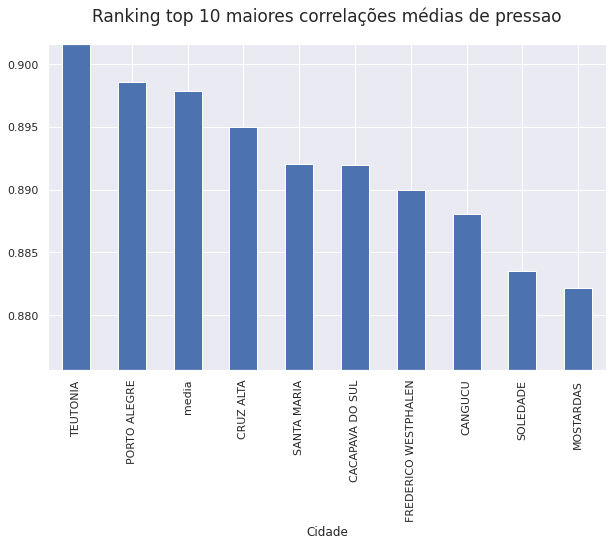

'temperatura'

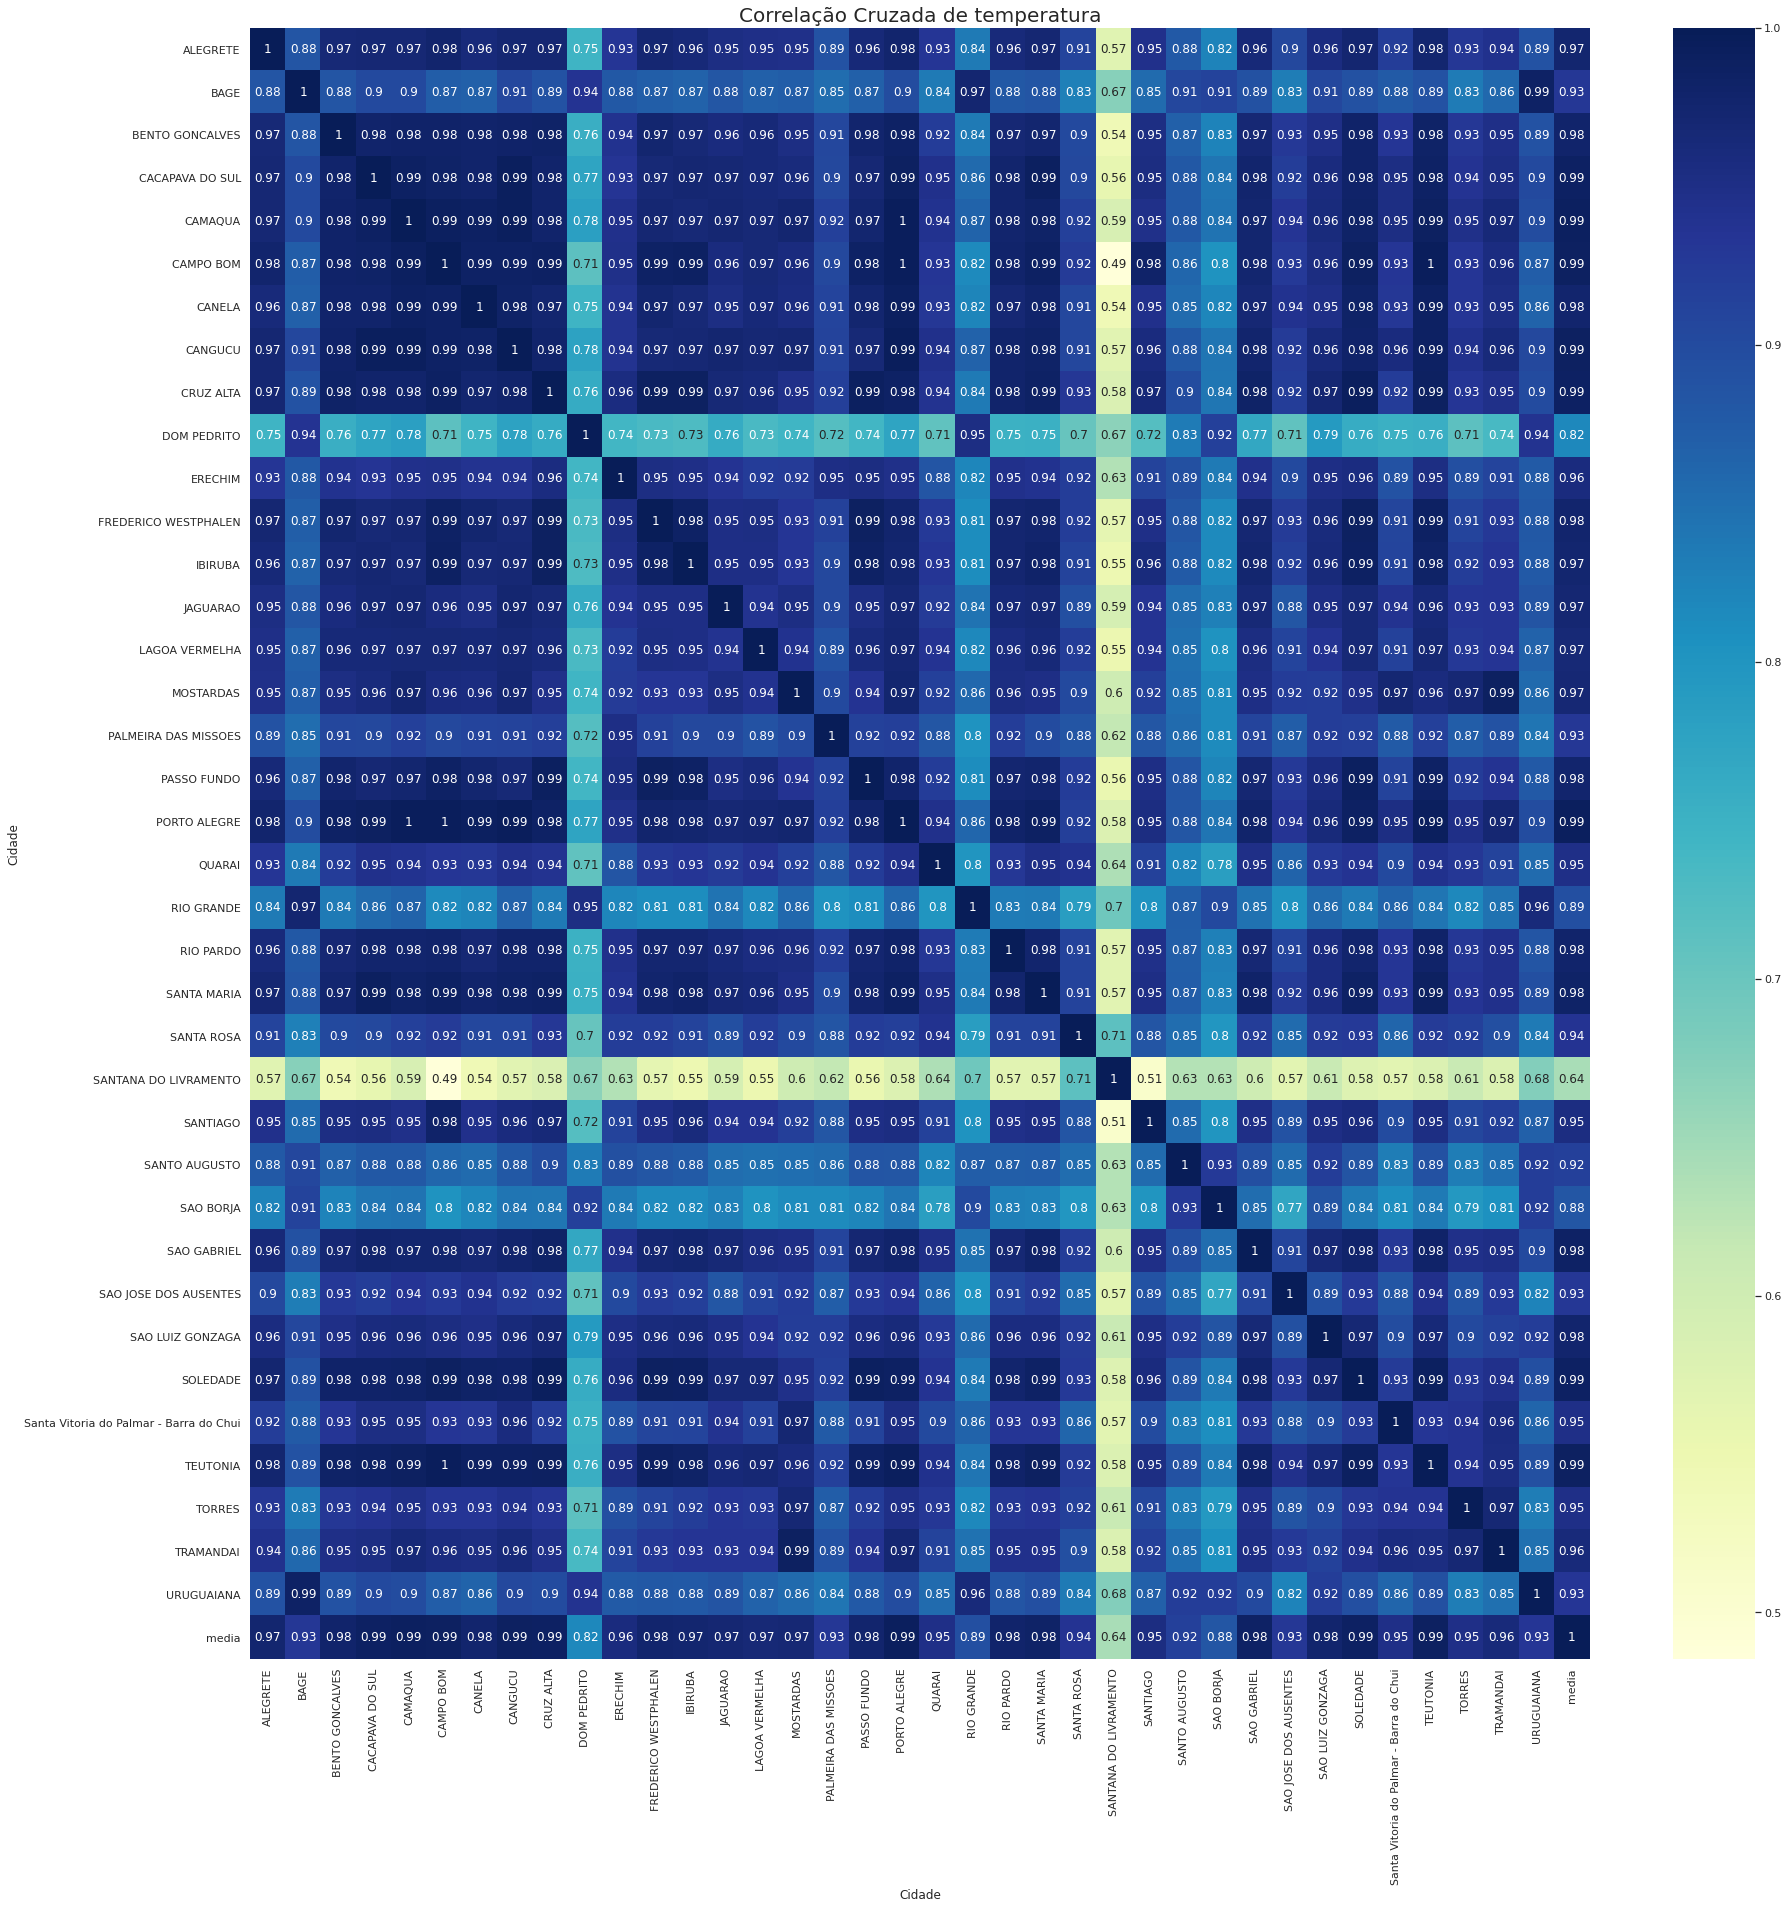

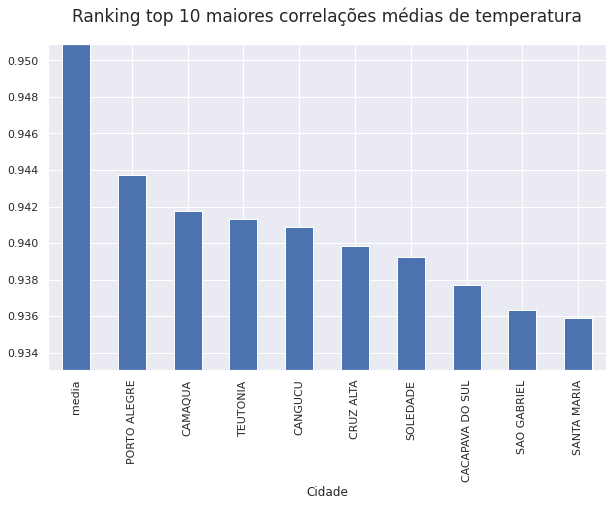

'vento_max'

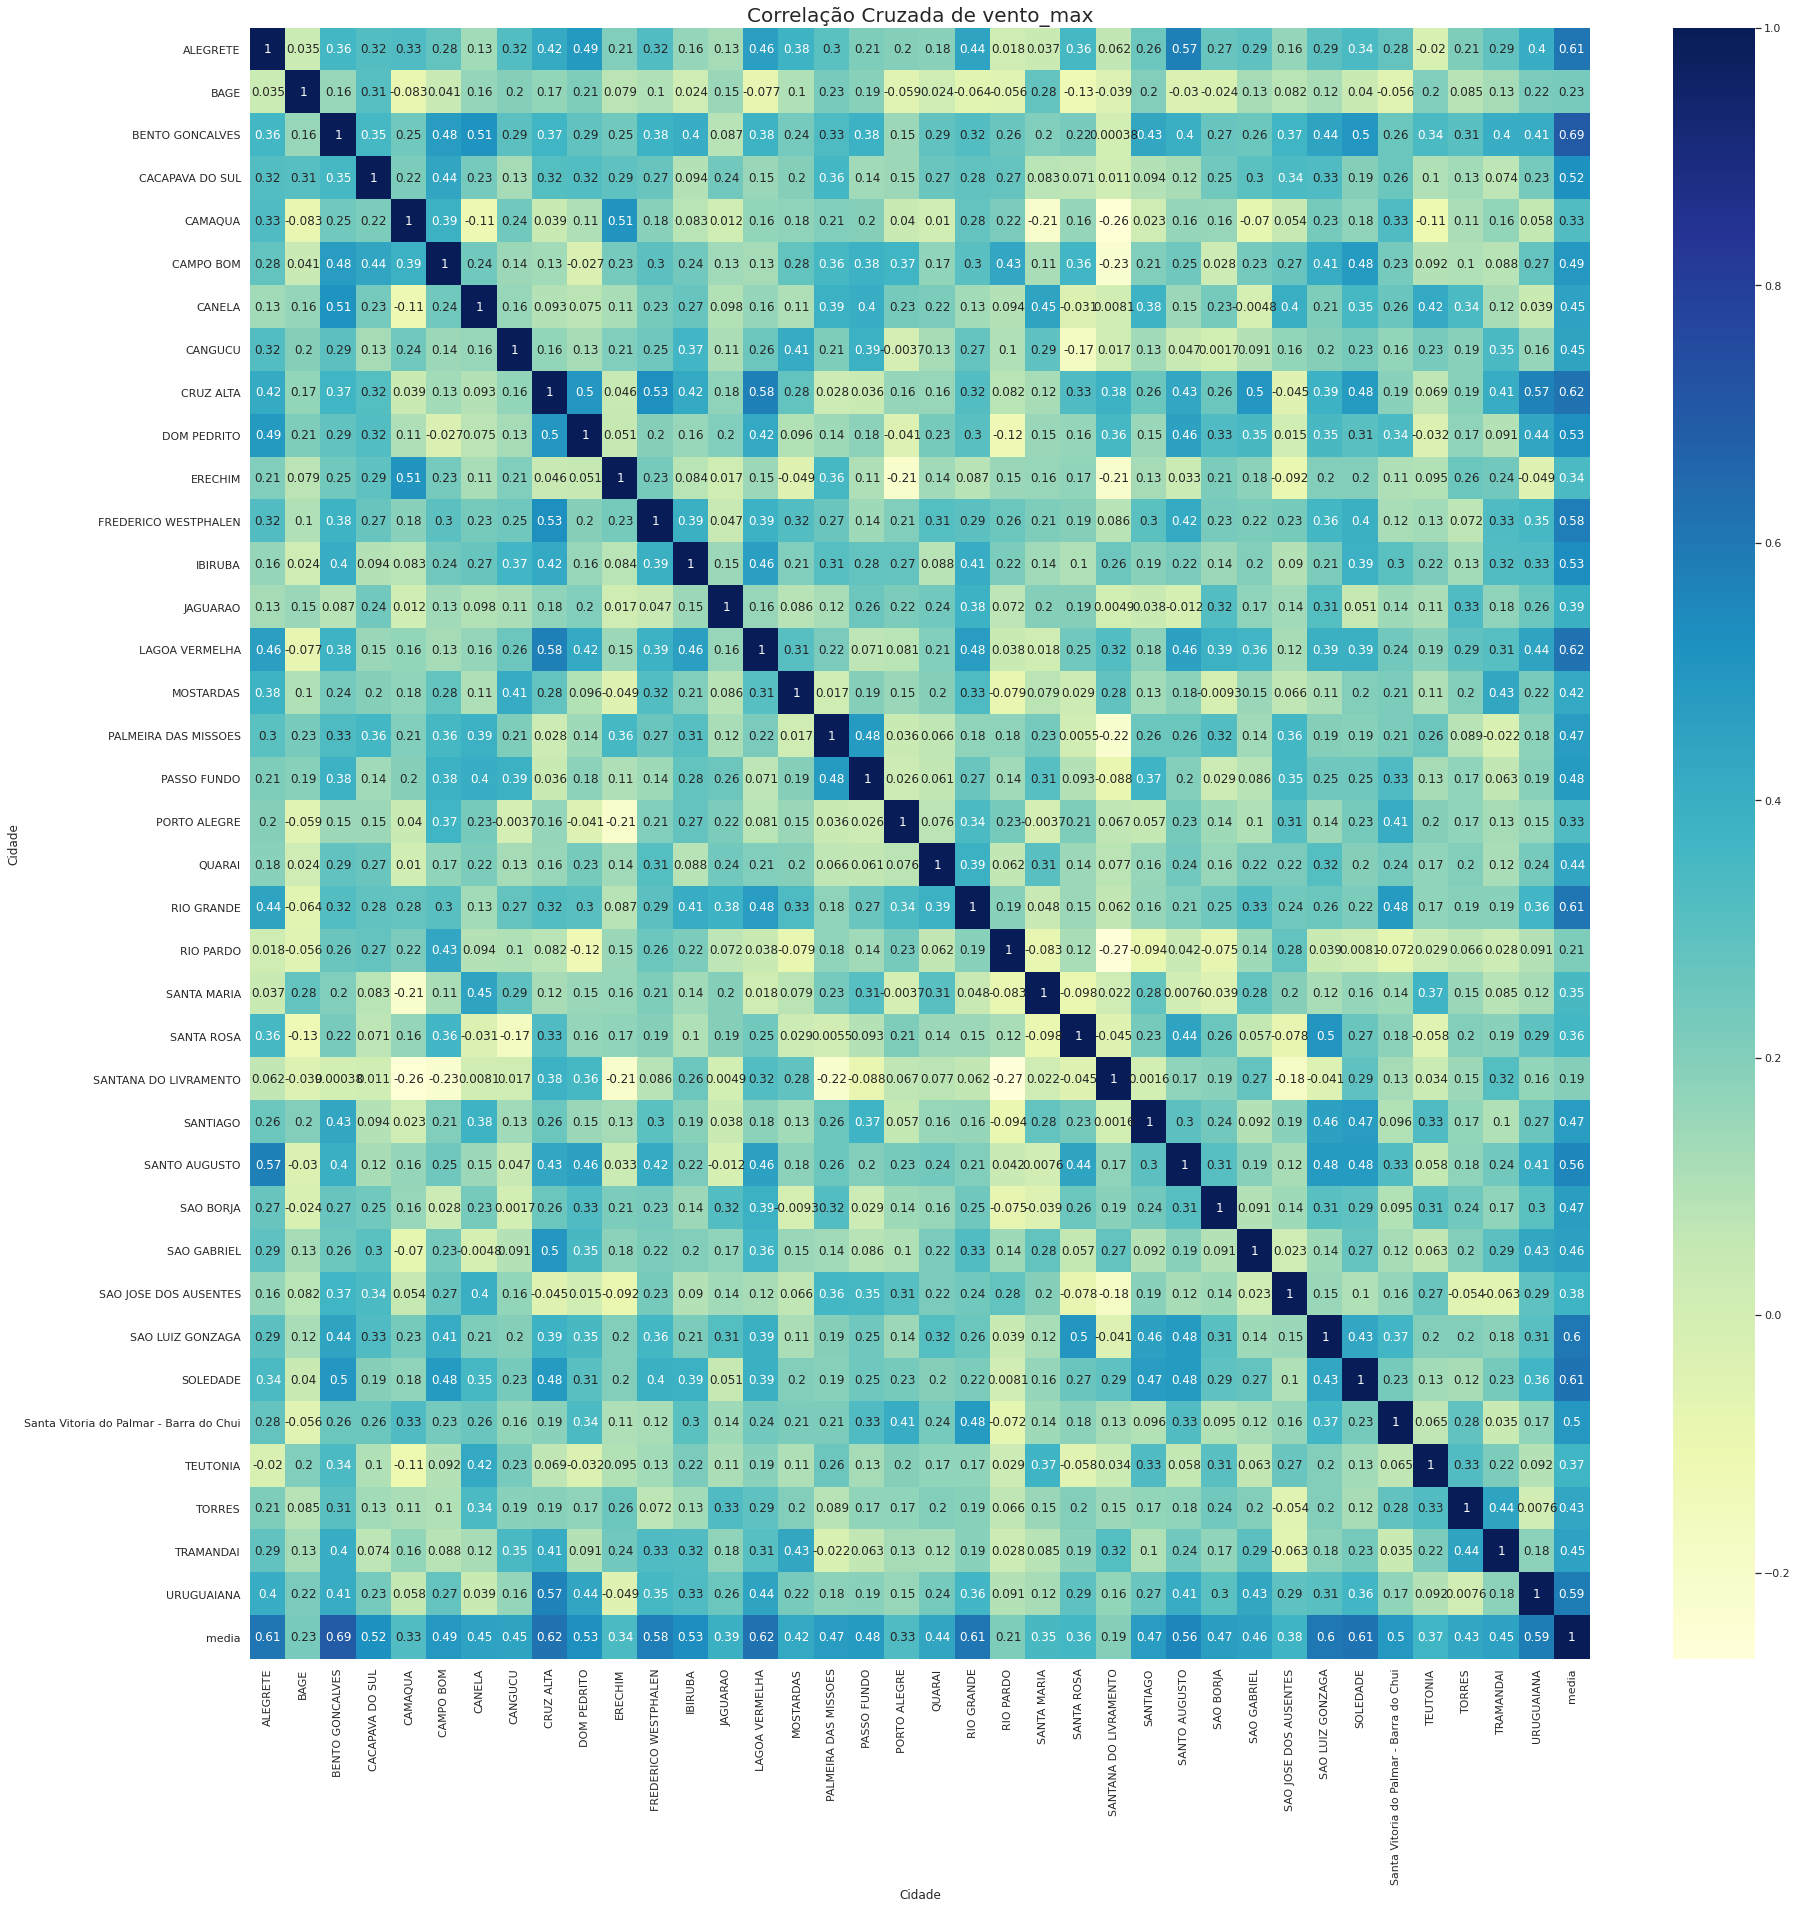

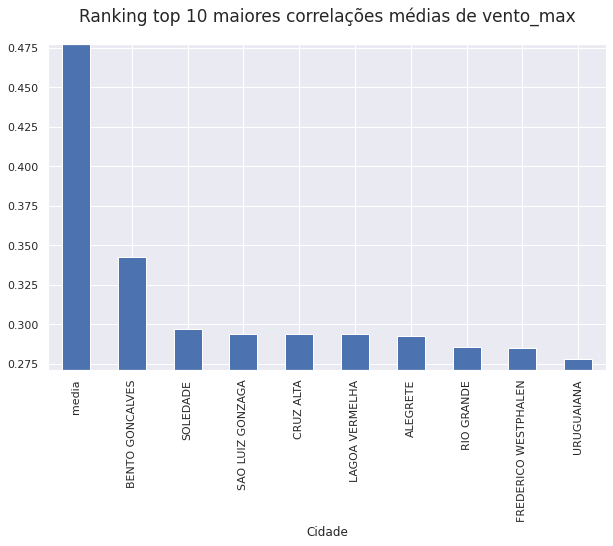

'vento_med'

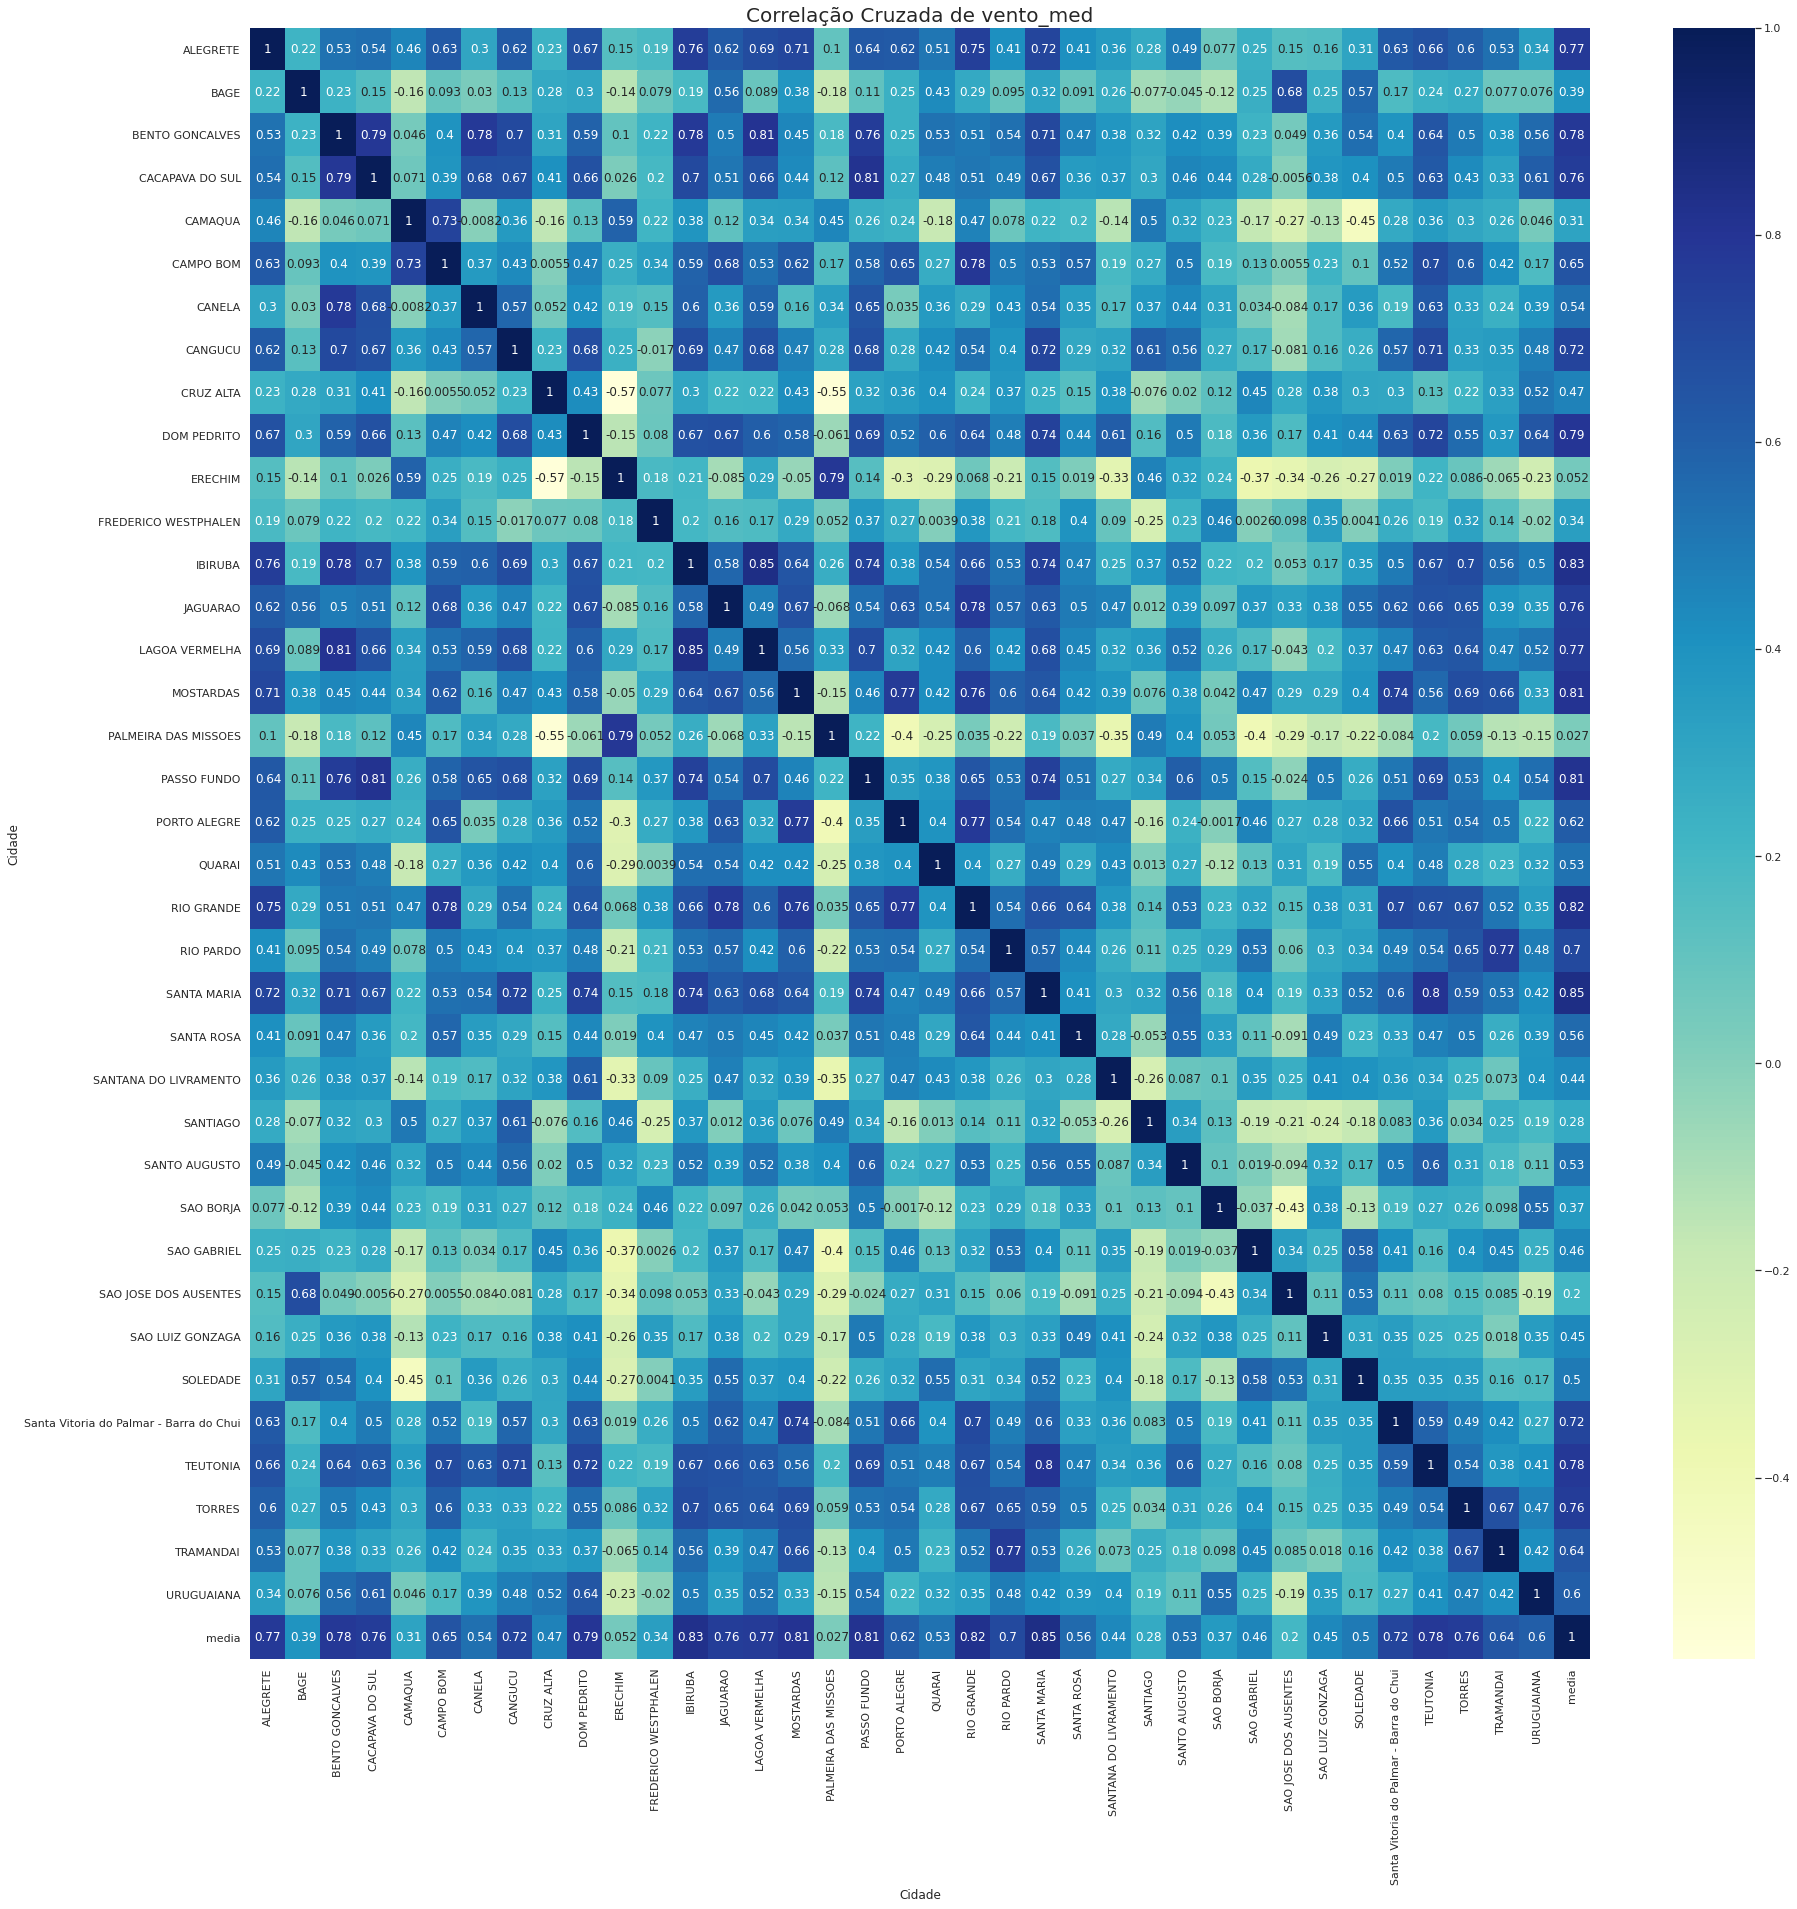

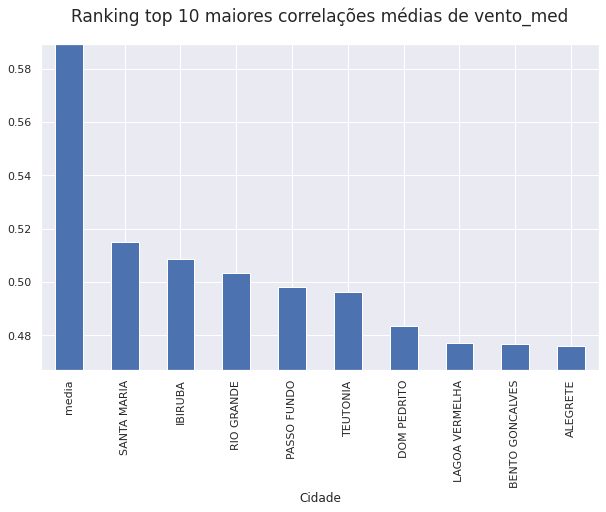

In [44]:
for i in parametros:
    analise_correlacao(i)

In [45]:
d = {('dt','data'): climaPivot.reset_index()['data'],
     ('dt','Ano'): climaPivot.reset_index()['data'].str[0:4],
     ('dt','Mês'): climaPivot.reset_index()['data'].str[5:7],
     ('dt','Ano Mês'): climaPivot.reset_index()['data'].str[0:7]}
datas = pd.DataFrame(d)

In [46]:
climaPivot = pd.merge(climaPivot,datas['dt'],right_on='data',left_on=('data'))
climaPivot.rename(columns={'Ano':('dt','Ano'),'Mês':('dt','Mês'),'Ano Mês':('dt','Ano Mês')}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


In [47]:
climaPivot.head()

data  (temperatura, ALEGRETE)  ...  (dt, Mês)  (dt, Ano Mês)
0  2013-01-31                23.786694  ...         01        2013-01
1  2013-02-28                23.691815  ...         02        2013-02
2  2013-03-31                20.572126  ...         03        2013-03
3  2013-04-30                19.190833  ...         04        2013-04
4  2013-05-31                15.472581  ...         05        2013-05

[5 rows x 232 columns]

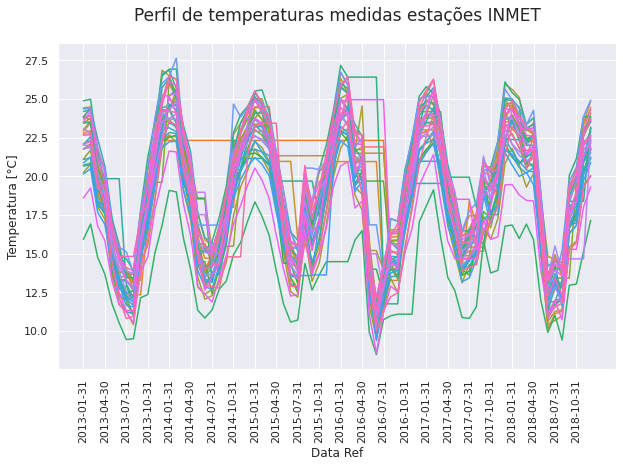

In [48]:
plt.figure(figsize=DefSize)
ax = sns.lineplot(data = climaEX,x = 'data', y= 'temperatura', hue='Cidade')
plt.title('Perfil de temperaturas medidas estações INMET', fontsize = 17, y=1.05)
plt.ylabel('Temperatura [°C]')
plt.xlabel('Data Ref')
plt.xticks(rotation = 90)
plt.legend().remove()
ax.set_xticks(ax.get_xticks()[::3])
plt.show();

In [49]:
parametrosT = ['Dias com Precipitação', 'Precipitacão', 'Pressão', 'Temperatura',
       'Vento Maxímo', 'Vento Médio']

parametrosU = ['', '[mm]', '[mB]', '[°C]',
       '[m/s]', '[m/s]']

len(parametros)

6

In [50]:
def perfil_medio_clima(_i, _Prefixo = 'Perfil Médio de ', _Escopo = ' no RS'):
    '''
    Gera gráficos de perfis de históricos climáticos apartir de Dataframe e
     Parâmetros de entrada
    '''
    dfTemp = climaPivot[[('dt', 'Ano'),('dt', 'Mês'),('dt', 'Ano Mês'),(parametros[_i],'media')]].reset_index()
    dfTemp.columns = ['col1','Ano','Mês','Ano Mês',parametros[_i]]
    dfTemp.drop('col1', axis =1, inplace = True)
    sns.set_theme()
    style.use(DefStyle)
    plt.figure(figsize=DefSize)
    plt.title(_Prefixo + parametrosT[_i] + _Escopo,y=1.05,fontsize = 17)
    ax = sns.lineplot(data=dfTemp,palette=DefPalette, x = 'Mês', y = parametros[_i], hue = 'Ano') #'hsv'
    plt.grid(True,linestyle = ':')
    #plt.xticks(rotation = 30)

    ax.legend(loc='center right', bbox_to_anchor=(1.15, 0.5), ncol=1, fancybox=False, shadow=True, title = 'Ano')
    plt.ylabel(parametrosT[_i] + ' ' + parametrosU[_i])
    plt.xlabel('Mês')
    plt.show()

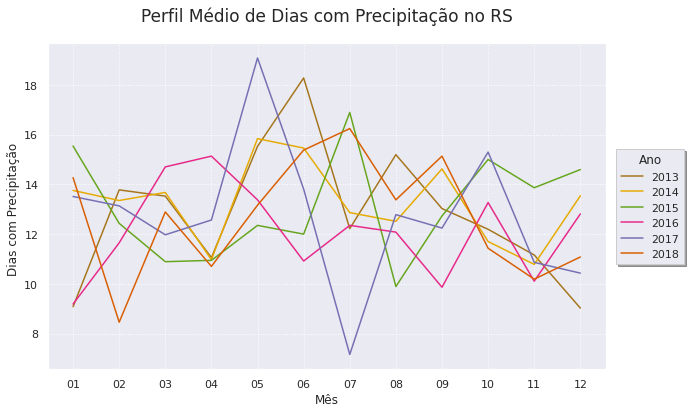

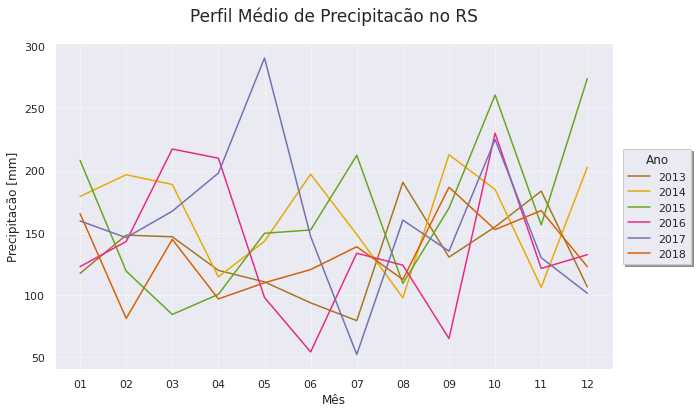

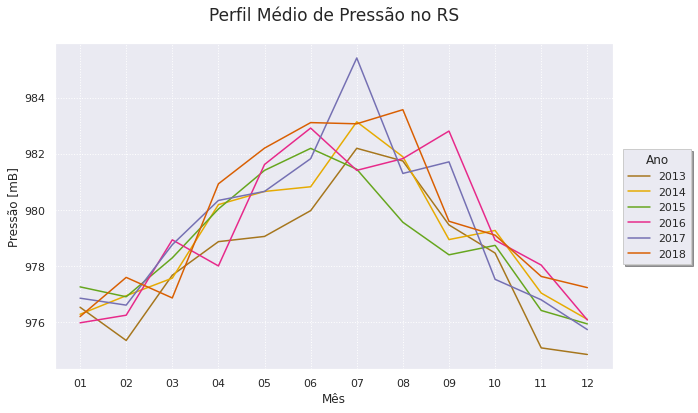

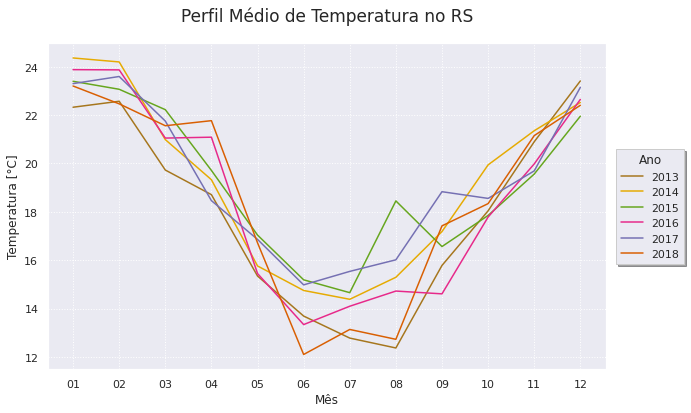

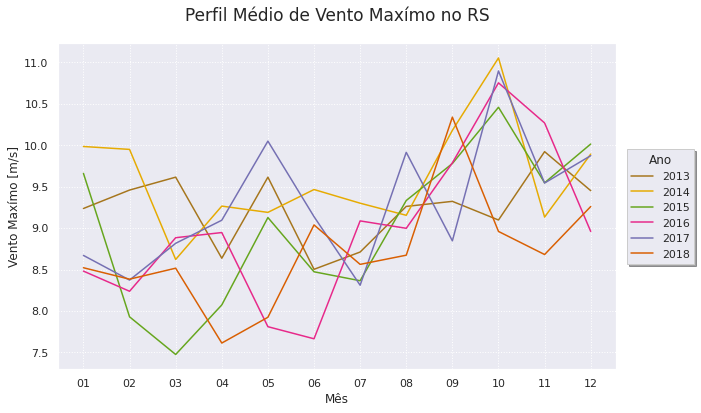

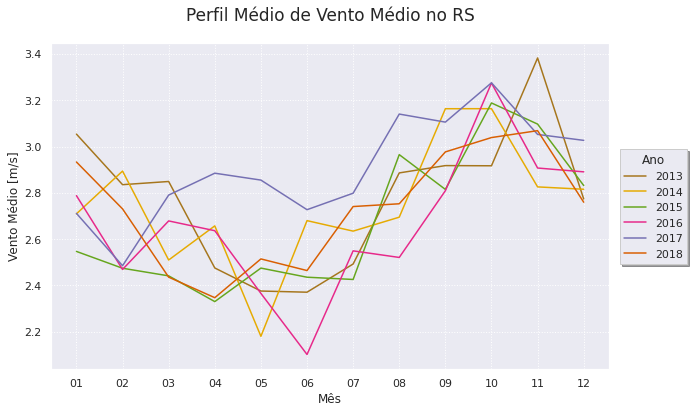

In [51]:
for i in range(0,len(parametros)):
    perfil_medio_clima(i, 'Perfil Médio de ', ' no RS')

##Juntando DF

In [52]:
climaPivot.sample(5)

data  (temperatura, ALEGRETE)  ...  (dt, Mês)  (dt, Ano Mês)
24  2015-01-31                23.747683  ...         01        2015-01
38  2016-03-31                21.314785  ...         03        2016-03
19  2014-08-31                15.707222  ...         08        2014-08
21  2014-10-31                21.379028  ...         10        2014-10
5   2013-06-30                13.328188  ...         06        2013-06

[5 rows x 232 columns]

In [53]:
dfClimaMed = climaPivot[[('data'),('dt', 'Ano'),('dt', 'Mês'),('dt', 'Ano Mês'),('Dias_com_precip','media'),
            ('precipitacao','media'),('pressao','media'),('temperatura','media'),
            ('vento_max','media'),('vento_med','media')]].reset_index()
dfClimaMed.columns = ['col1','Data','Ano','Mês','Ano Mês','Dias com Precipitação',
                  'Precipitação','Pressão','Temperatura','Vento Máx','Vento Méd']
dfClimaMed.drop('col1', axis =1, inplace = True)
dfClimaMed.head()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Data   Ano Mês  Ano Mês  ...     Pressão  Temperatura  Vento Máx  Vento Méd
0  2013-01-31  2013  01  2013-01  ...  976.542712    22.323023   9.236111   3.053842
1  2013-02-28  2013  02  2013-02  ...  975.360036    22.569606   9.458333   2.835475
2  2013-03-31  2013  03  2013-03  ...  977.684966    19.726666   9.613889   2.849183
3  2013-04-30  2013  04  2013-04  ...  978.880230    18.709059   8.636111   2.475605
4  2013-05-31  2013  05  2013-05  ...  979.065763    15.344357   9.613889   2.375910

[5 rows x 10 columns]

In [54]:
dfClimaMed.corr()

Dias com Precipitação  ...  Vento Méd
Dias com Precipitação               1.000000  ...  -0.110965
Precipitação                        0.603485  ...   0.408570
Pressão                             0.106778  ...  -0.322083
Temperatura                        -0.304594  ...   0.193680
Vento Máx                           0.217580  ...   0.688467
Vento Méd                          -0.110965  ...   1.000000

[6 rows x 6 columns]

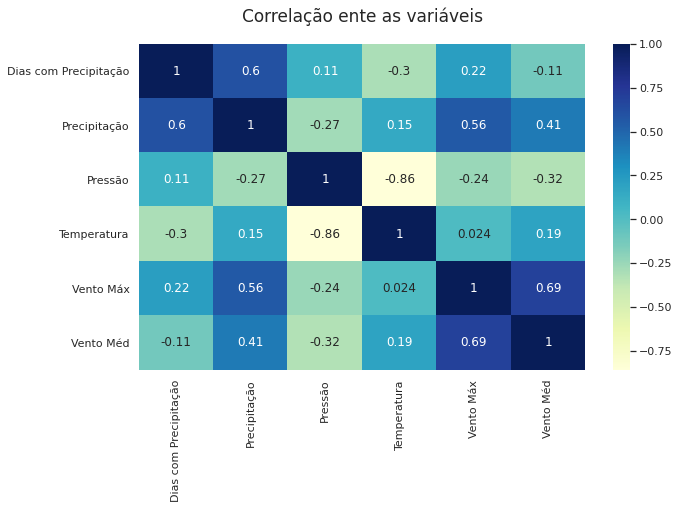

In [55]:
sns.set_theme()
style.use(DefStyle)  #4
#plt.rc_context({'axes.edgecolor':'gray', 'xtick.color':'white', 'axes.titlecolor':'white','ytick.color':'white', 'figure.facecolor':'black'})

plt.figure(figsize=DefSize)
plt.title('Correlação ente as variáveis',y=1.05,fontsize = 17)
ax = sns.heatmap(dfClimaMed.corr(),cmap="YlGnBu", annot=True) 

In [56]:
dfrsrural.reset_index(inplace = True)
dfrsrural['Ano Mês'] = dfrsrural['Data'].astype(str)
dfrsrural['Ano Mês'] = dfrsrural['Ano Mês'].str.slice(0,7)

In [57]:
dfClimaMed['Data'] = pd.to_datetime(dfClimaMed['Data'])

In [58]:
dfConsumoClima = pd.merge(dfrsrural[['Ano Mês','Consumo']],dfClimaMed,left_on='Ano Mês',right_on='Ano Mês')
dfConsumoClima.drop(columns='Data', inplace = True)

In [59]:
dfConsumoClima['Ano'] = dfConsumoClima['Ano'].astype(int)

In [60]:
dfConsumoClima.corr()

Consumo       Ano  ...  Vento Máx  Vento Méd
Consumo                1.000000  0.396772  ...  -0.301492  -0.155313
Ano                    0.396772  1.000000  ...  -0.226920   0.043093
Dias com Precipitação -0.142244 -0.071579  ...   0.217580  -0.110965
Precipitação           0.001241 -0.036054  ...   0.558776   0.408570
Pressão               -0.491499  0.180382  ...  -0.244932  -0.322083
Temperatura            0.744991  0.036315  ...   0.024348   0.193680
Vento Máx             -0.301492 -0.226920  ...   1.000000   0.688467
Vento Méd             -0.155313  0.043093  ...   0.688467   1.000000

[8 rows x 8 columns]

In [61]:
dfConsumoClima

Ano Mês     Consumo   Ano  ... Temperatura  Vento Máx  Vento Méd
0   2013-01  339480.000  2013  ...   22.323023   9.236111   3.053842
1   2013-02  414663.000  2013  ...   22.569606   9.458333   2.835475
2   2013-03  323379.000  2013  ...   19.726666   9.613889   2.849183
3   2013-04  254855.000  2013  ...   18.709059   8.636111   2.475605
4   2013-05  212174.000  2013  ...   15.344357   9.613889   2.375910
..      ...         ...   ...  ...         ...        ...        ...
67  2018-08  284391.552  2018  ...   12.728181   8.672973   2.752923
68  2018-09  281438.973  2018  ...   17.418561  10.337838   2.976997
69  2018-10  278643.915  2018  ...   18.337759   8.959459   3.038972
70  2018-11  310718.774  2018  ...   21.149839   8.681081   3.068813
71  2018-12  395485.763  2018  ...   22.403110   9.259459   2.759637

[72 rows x 10 columns]

In [62]:
stl[14]

'seaborn-darkgrid'

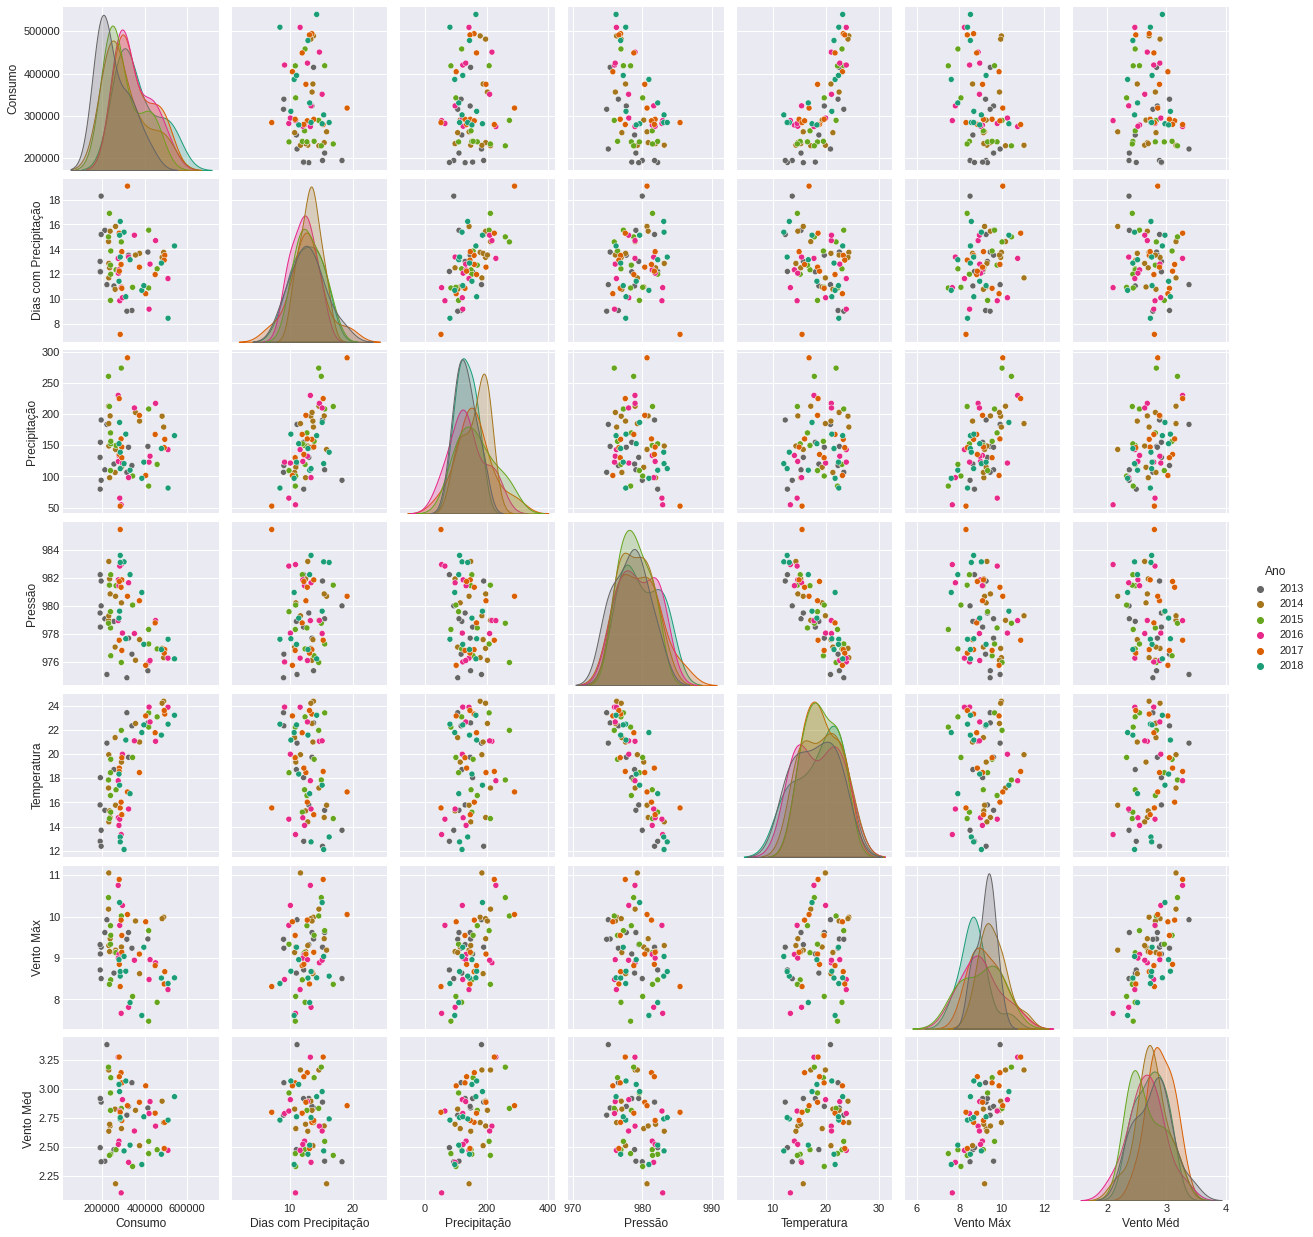

In [63]:
sns.set_theme()
style.use(stl[14])  #4
#style.context('ss')
#plt.rc_context({'axes.edgecolor':'gray', 'xtick.color':'white', 'axes.titlecolor':'white','axes.labelcolor':'white','ytick.color':'white', 'figure.facecolor':'black'})
#plt.rc_context({'axes.edgecolor':'gray', 'xtick.color':'white', 'ytick.color':'white', 'figure.facecolor':'black', 'title.color':'white' })
g = sns.pairplot(dfConsumoClima, hue = "Ano", palette=DefPalette)
#g.map(sns.scatterplot)
#g.map_diag(sns.histplot)
#g.map_offdiag(sns.scatterplot)
#g.map(sns.lineplot)
#g.xticks(rotation = 90)
#plt.gcf().set_size_inches()
#print(g)


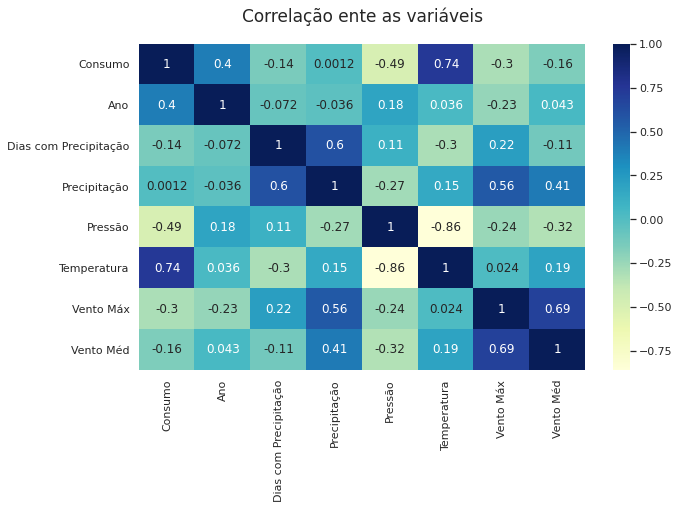

In [64]:
sns.set_theme()
style.use(DefStyle)  #4
#plt.rc_context({'axes.edgecolor':'gray', 'xtick.color':'white', 'axes.titlecolor':'white','ytick.color':'white', 'figure.facecolor':'black'})

plt.figure(figsize=DefSize)
plt.title('Correlação ente as variáveis',y=1.05,fontsize = 17)
ax = sns.heatmap(dfConsumoClima.corr(),cmap="YlGnBu", annot=True) 

##Abordagem inicial

##Média Aritmética

In [65]:
dfConsumoClima['Consumo Médio'] = dfConsumoClima['Consumo'].mean()
mean_absolute_percentage_error(dfConsumoClima['Consumo'],dfConsumoClima['Consumo Médio'])

0.2481091264606509

##Regressão Linear

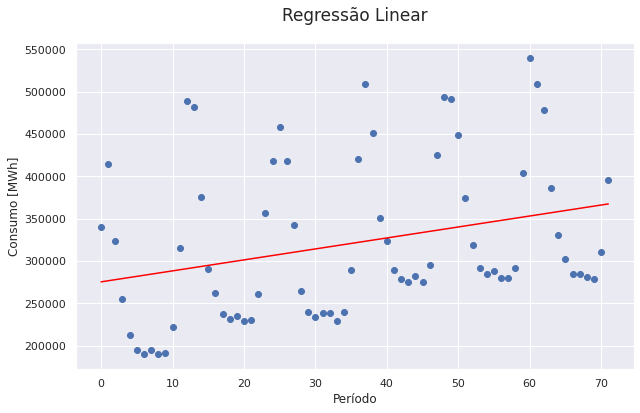

0.24119221078730244

In [66]:
data = dfConsumoClima['Consumo'].reset_index()
X = data.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = data.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

sns.set_theme()
style.use(DefStyle)
plt.figure(figsize=DefSize)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.title('Regressão Linear', fontsize = 17, y=1.05)
plt.ylabel('Consumo [MWh]')
plt.xlabel('Período')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(formatador_de_milhares))
plt.show();

dfConsumoClima['Rlin'] = Y_pred
display(mean_absolute_percentage_error(dfConsumoClima['Consumo'],Y_pred))

In [67]:
def perfil_consumo_vs_prev(a):
    sns.set_theme()
    style.use(DefStyle) 
    plt.figure(figsize=DefSize)

    ax1 = sns.lineplot(dfConsumoClima['Ano Mês'],dfConsumoClima['Consumo'], label = 'Real', palette = 'Dark2')
    ax2 = sns.lineplot(dfConsumoClima['Ano Mês'],dfConsumoClima['Consumo Médio'], label = 'Médio',palette = 'Dark2')
    ax3 = sns.lineplot(dfConsumoClima['Ano Mês'],dfConsumoClima['Rlin'], label = 'Rlin',palette = 'Dark2')
    if a:
        ax4 = sns.lineplot(dfConsumoClima['Ano Mês'],dfConsumoClima['Consumo_fuzzy'],linestyle = '--', linewidth=2 , label = 'Fuzzy',palette = 'Dark2_r')

    plt.legend()
    plt.grid(True,linestyle = DefGrid)
    plt.title('Perfil de consumo Rural no RS Previsto vs Medido', fontsize=17, y=1.05)
    ax3.yaxis.set_major_formatter(ticker.FuncFormatter(formatador_de_milhares))
    plt.ylabel('Consumo [MWh]')
    ax3.set_xticks(ax3.get_xticks()[::3])
    plt.xticks(rotation = 90, fontsize=10)

    plt.show()
    ;

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


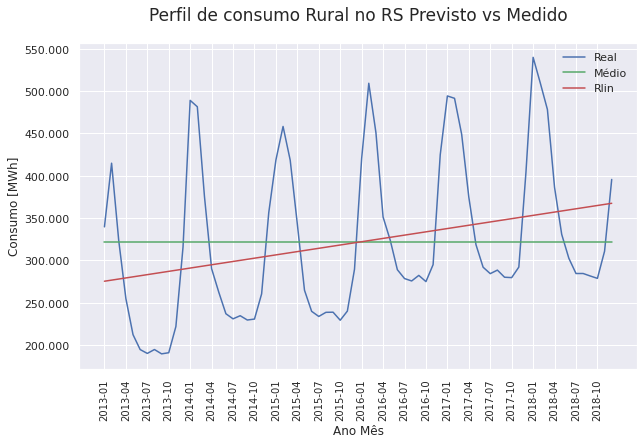

In [68]:
perfil_consumo_vs_prev(0)

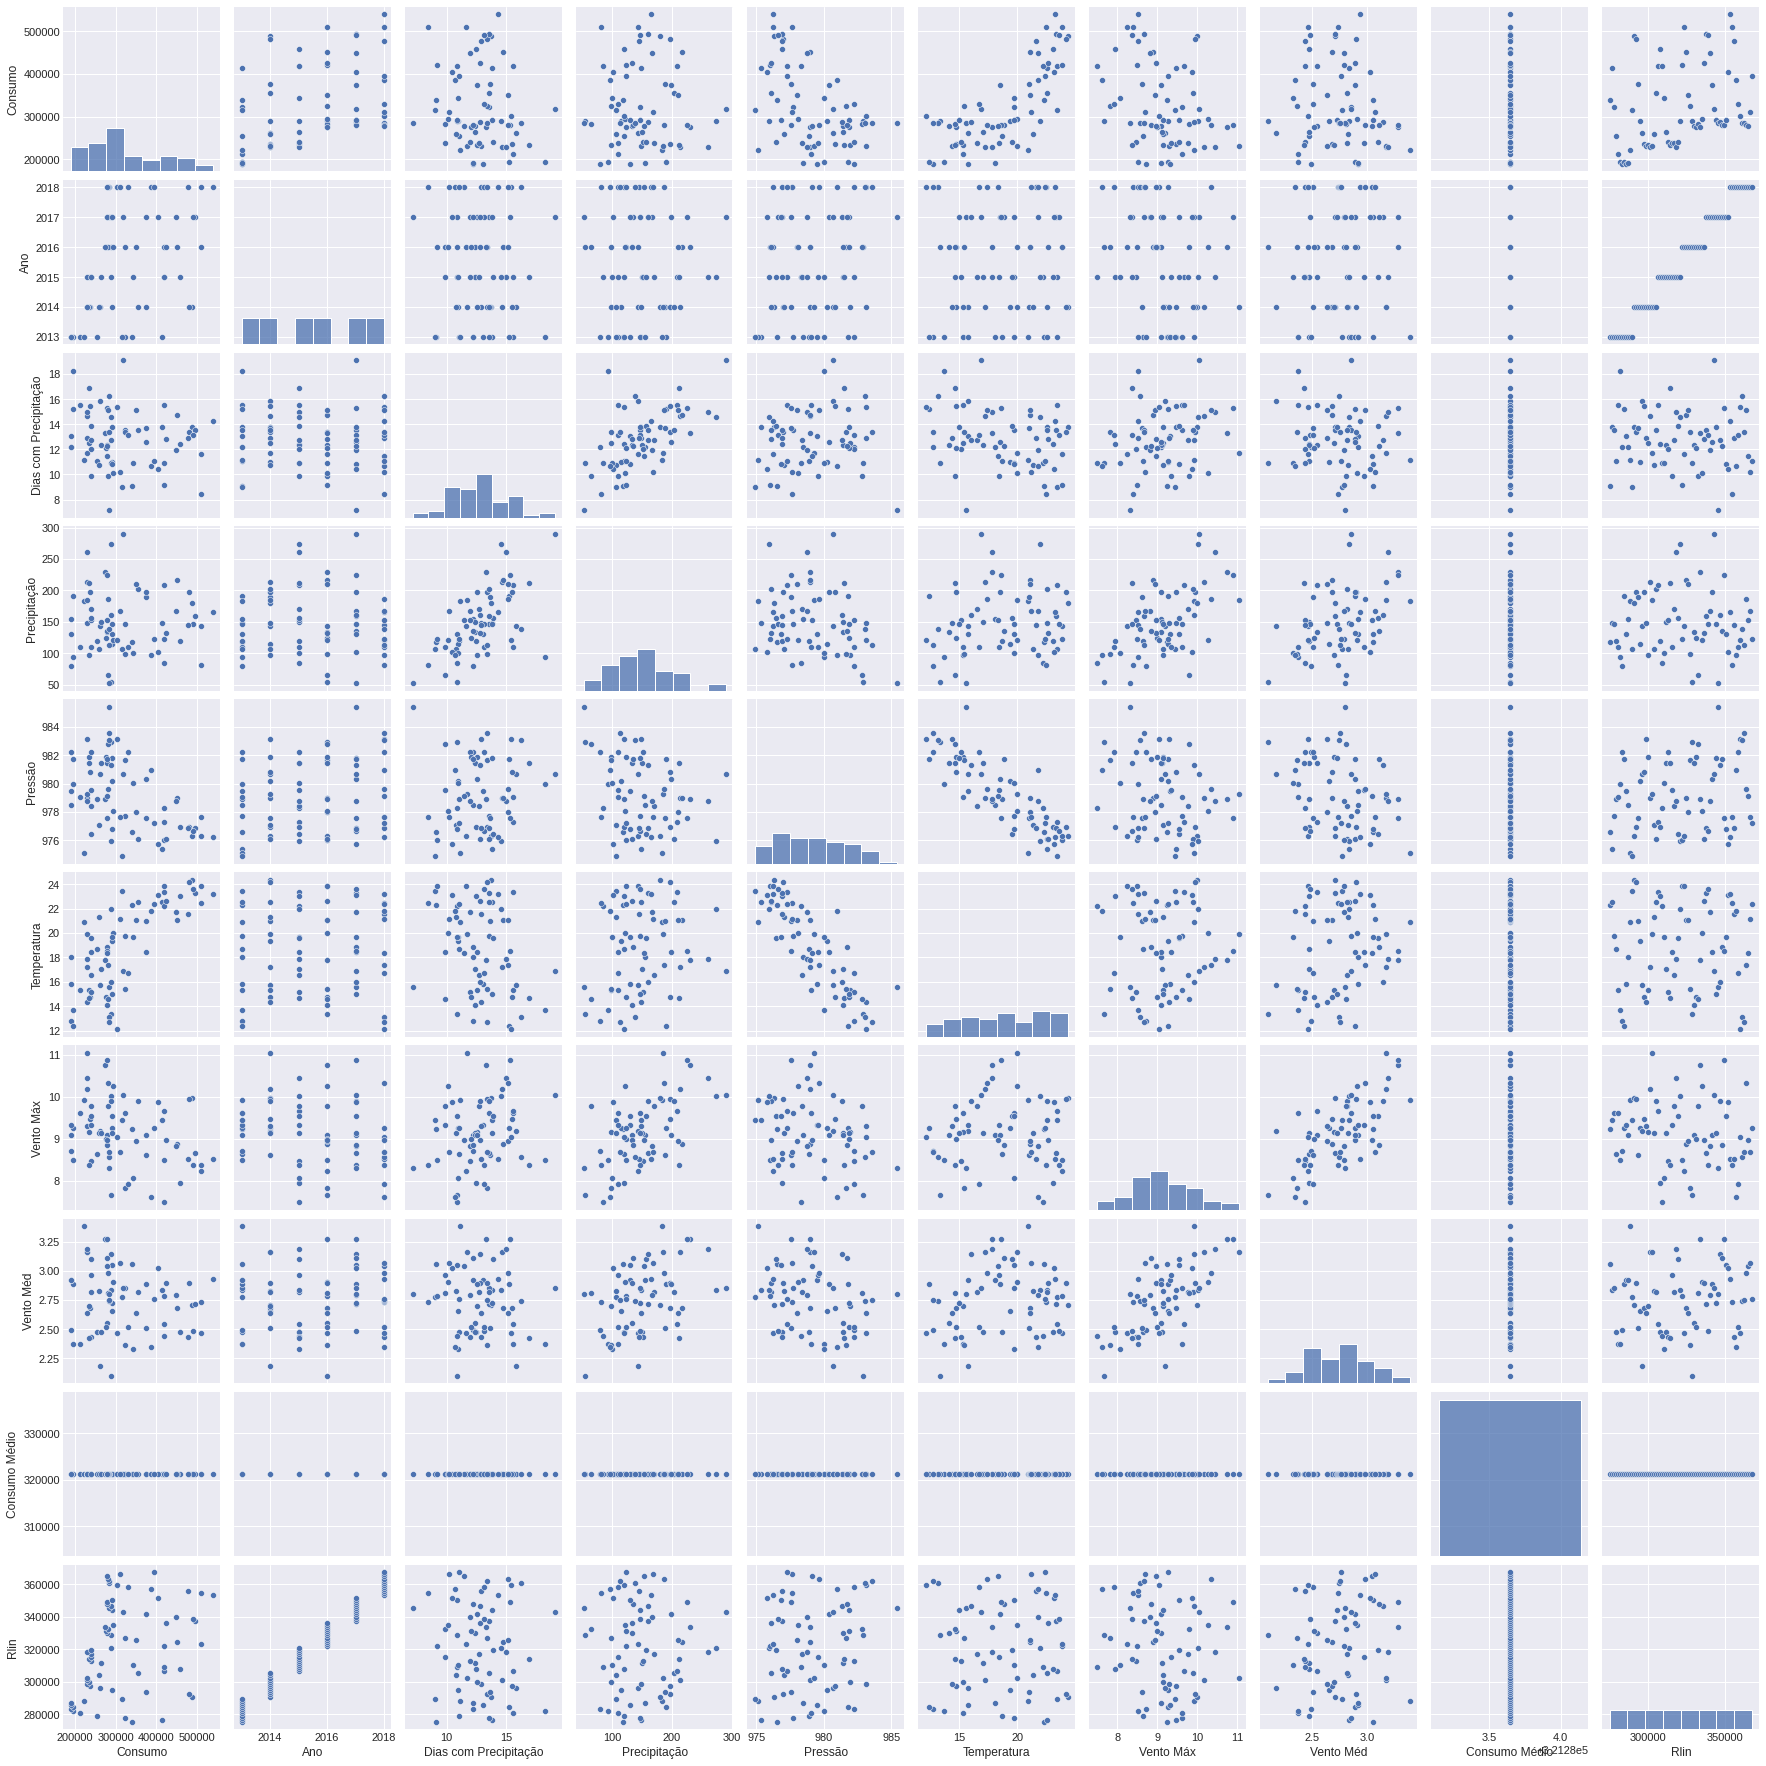

In [69]:
#sns.set_theme()
style.use(stl[14])  #4
style.context('dark_background')
g = sns.pairplot(dfConsumoClima, palette=DefPalette)
plt.show()

In [72]:
dfConsumoClima.to_csv(swap+'dfConsumoClima.csv', index=False)

Disponivel em: 
https://github.com/lvb86/MLPr_GA/blob/main/swap/dfConsumoClima.csv